#DOCUEMENTACIÓN


##Enlaces

>https://www.kaggle.com/mohitkr05/spotify-data-visualization


> https://towardsdatascience.com/top-spotify-song-express-exploration-with-plotly-express-in-python-3f3b6afdb2b7

>https://www.kaggle.com/xuvia02/music-popularity-vs-music-awards


##Problemas y dudas

Pensar si nos interesa incluir la variable de genero dentro del dataset para ser más concretos haciendo el análsis (seguramnte si) tendríamos que hacer un merge usando el ID de la canción 

> Problema el dataset de GENRES no tiene ID 
>https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv


##Preguntas 

- ¿Artistas más populares? 
- ¿Qué canciones clásicas/antiguas siguen siendo populares? 
- ¿Las canciones con títulos largos o cortos son populares?
- ¿Qué canciones son las que más gustan?
- ¿Qué patrón comparten las caniones más populares? 

###Ideas de visualización 

https://towardsdatascience.com/what-makes-a-song-likeable-dbfdb7abe404


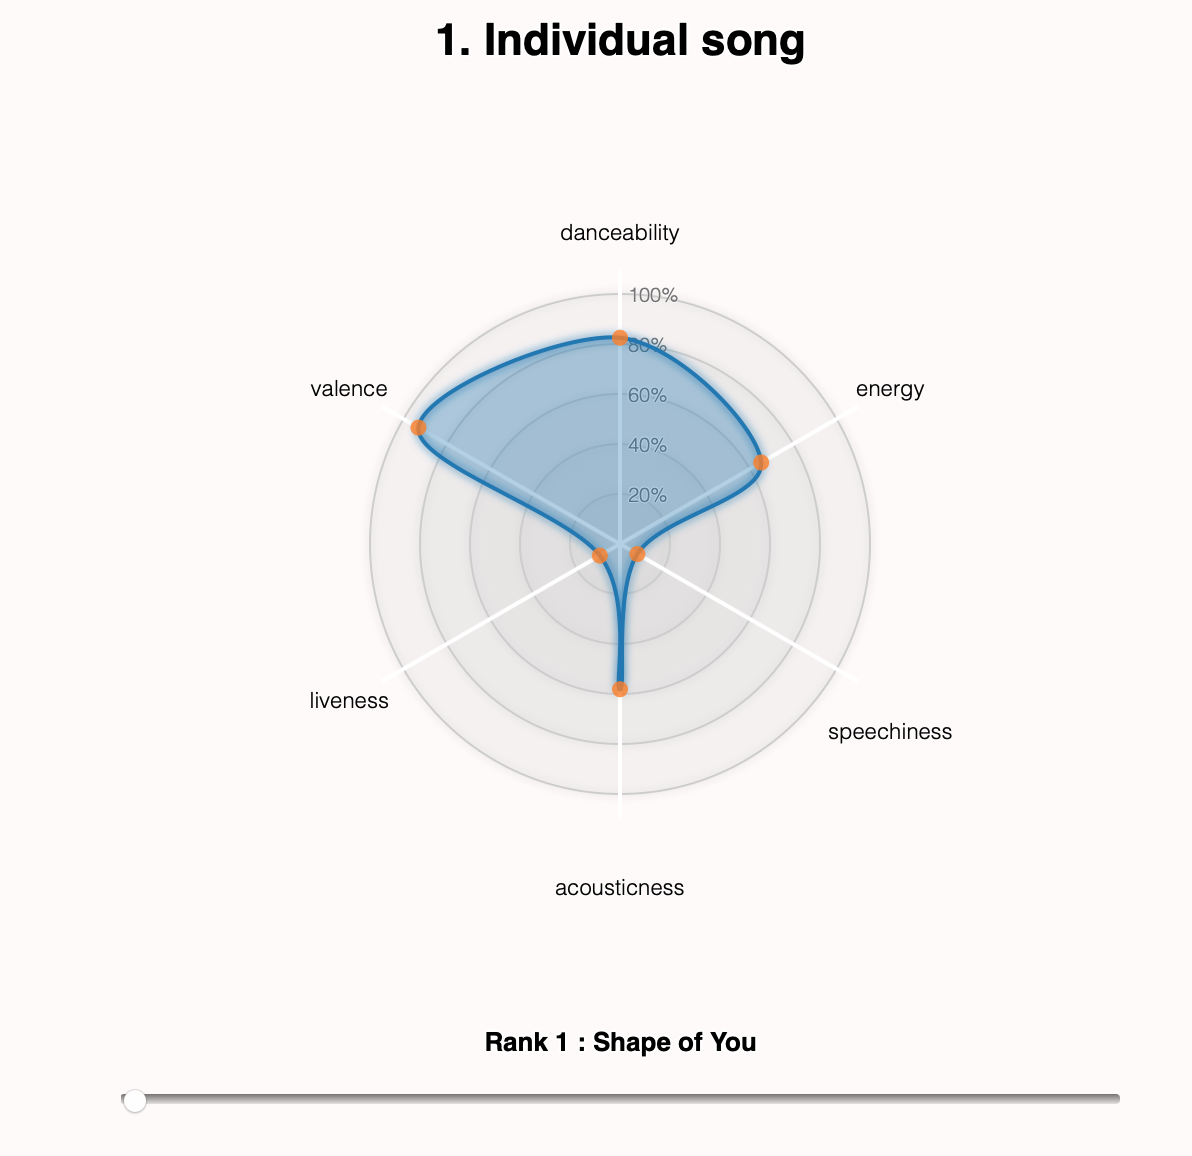

##Datos

Primaria:

- id (Id of track generated by Spotify)
Numéricas:
- acousticness (Rango de 0 a 1)
- danceability (Rango de 0 a 1)
- energy (Rango de 0 a 1)
- duration_ms (Integer rango de 200k a 300k)
- instrumentalness (Rango de 0 a 1)
- valence (Rango de 0 a 1)
- popularity (Rango de 0 a 100)
- tempo (Float rango de 50 a 150)
- liveness (Rango de 0 a 1)
- loudness (Float rango de -60 a 0)
- speechiness (Rango de 0 a 1)
- year (Rango de 1960 a 2020)

Categóricas:

- key
- artists (Lista de artistas, puede contener más de uno)
- name (Nombre de la canción)

Extra:

- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit, 1 = Explicit)


#CÓDIGO

##Instalar Librerias

In [15]:
packages = c("readr", "Matrix","glue", "reshape2", "dplyr", "tidyr", "ggvis", "corrplot", "DT", "cluster", "wordcloud", "RColorBrewer", "tm")
newpack  = packages[!(packages %in% installed.packages()[,"Package"])]

if(length(newpack)) install.packages(newpack)
a=lapply(packages, library, character.only=TRUE)

##Cargar datos

In [16]:
# Datos de canciones
url ="https://raw.githubusercontent.com/HaizeaR/Spotify/main/data.csv"




In [17]:
library(readr)
#library(tidyverse)

#datos = read.table(url, header = TRUE, fill = TRUE, sep = ';')
datos = read.csv(url, header = TRUE, fill = TRUE, sep = ',')

knitr::kable(head(datos))




|  X.1|    X| acousticness|artists                                                                                                                                       | danceability| duration_ms| energy| explicit|id                     | instrumentalness| key| liveness| loudness| mode|name                                           | popularity|release_date | speechiness|   tempo| valence| year|
|----:|----:|------------:|:---------------------------------------------------------------------------------------------------------------------------------------------|------------:|-----------:|------:|--------:|:----------------------|----------------:|---:|--------:|--------:|----:|:----------------------------------------------|----------:|:------------|-----------:|-------:|-------:|----:|
| 1001| 2055|        0.797|['Sam Cooke']                                                                                                                                 |        0.332|      171320| 

##Arregalar los datos 

In [18]:
# No nos interesa esta columna porque tenemos la del año 
datos$release_date = NULL 
datos$X = NULL
datos$'X.1' = NULL
datos$id = factor(datos$id)
datos$name = factor(datos$name)
datos$artists = factor(datos$artists)




Revisar lo que son X.1 y X 

ID es la clave única de la canción. 

Name es el título y al parecer varias palabras se repiten


In [19]:
summary(datos)

  acousticness                      artists        danceability   
 Min.   :0.0000   ['Bob Dylan']         :   539   Min.   :0.0000  
 1st Qu.:0.0426   ['The Rolling Stones']:   512   1st Qu.:0.4390  
 Median :0.2470   ['The Beach Boys']    :   491   Median :0.5630  
 Mean   :0.3496   ['Queen']             :   426   Mean   :0.5551  
 3rd Qu.:0.6370   ['The Beatles']       :   410   3rd Qu.:0.6800  
 Max.   :0.9960   ['Fleetwood Mac']     :   398   Max.   :0.9880  
                  (Other)               :118880                   
  duration_ms          energy          explicit     
 Min.   :  14708   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 180800   1st Qu.:0.3950   1st Qu.:0.0000  
 Median : 222139   Median :0.5910   Median :0.0000  
 Mean   : 238021   Mean   :0.5743   Mean   :0.1015  
 3rd Qu.: 271281   3rd Qu.:0.7770   3rd Qu.:0.0000  
 Max.   :5403500   Max.   :1.0000   Max.   :1.0000  
                                                    
                      id         instrum

##Primeras visualizaciones

Hacemos un boxplot que nos muestra la populariadad de las canciones dependiendo de su año. Esto lo hacemos para decidir si realmente merece la pena centrarnos más en los últimos años. 
Como vemos 2020 es un año bastante especial pues tiene una gran cantidad de valores debajo del 1º cuartil. 

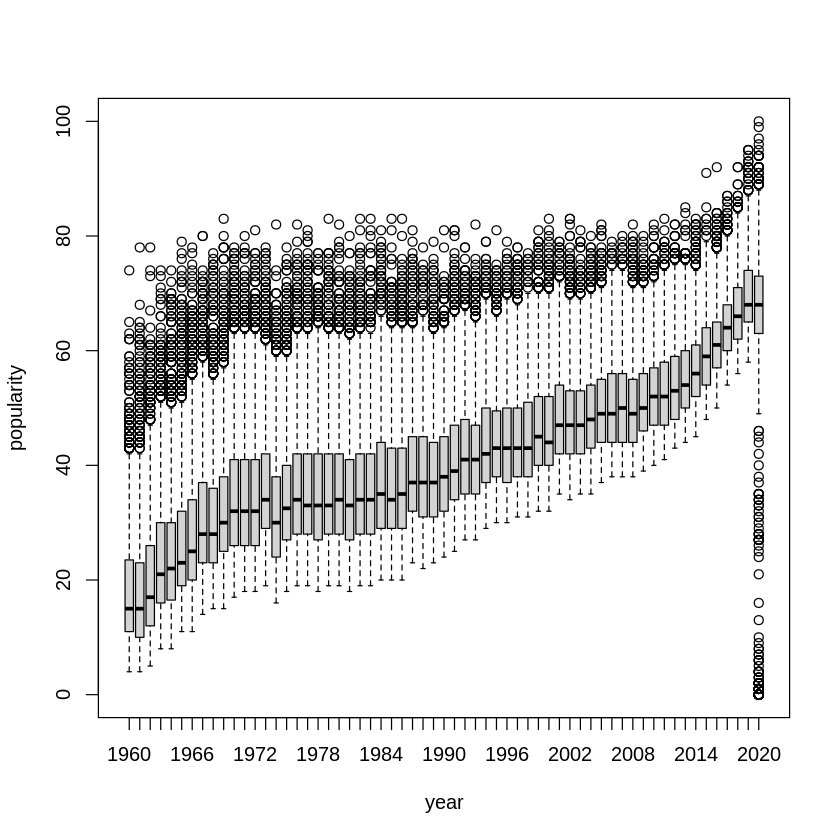

In [20]:
boxplot( formula = popularity~year, data =  datos)

CONCLUSIONES 
> Es razonable tener canciones con alta popularidad en todos los años. Lo que nos llama más la antención en lo que ocurre en 2020,
>>Este año encontramos muchos valores por debajo del 1º quartil, algo que no ocurre en los años anteriores.  



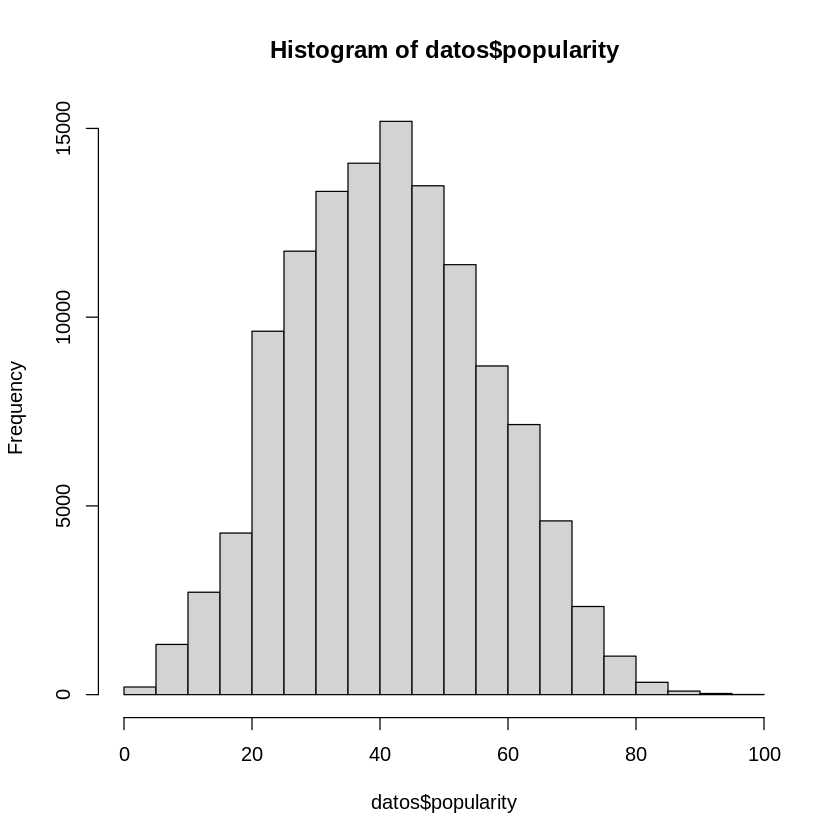

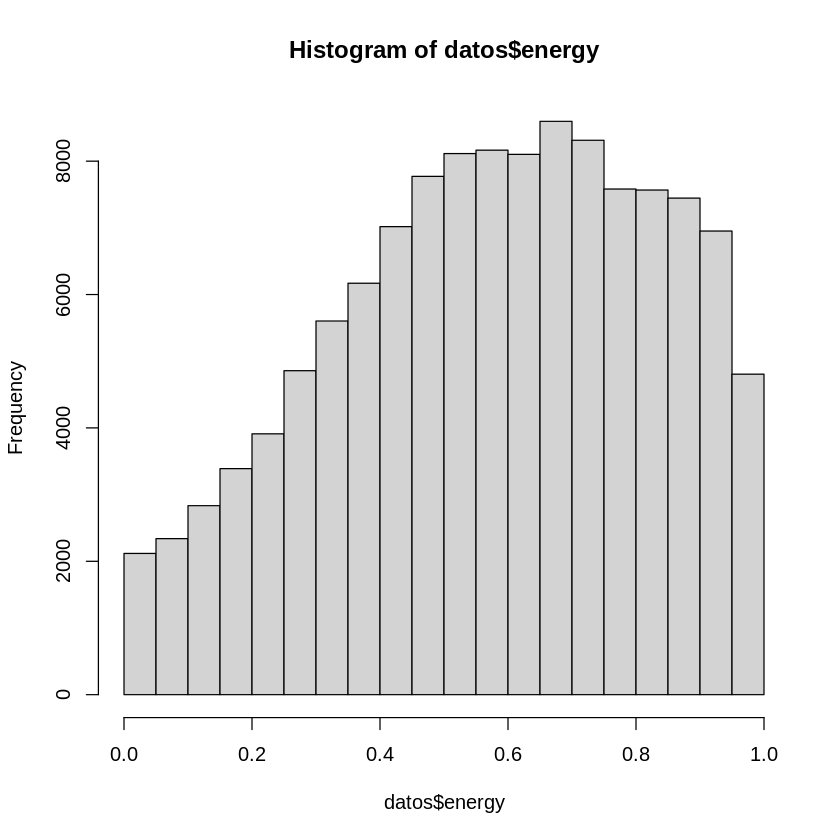

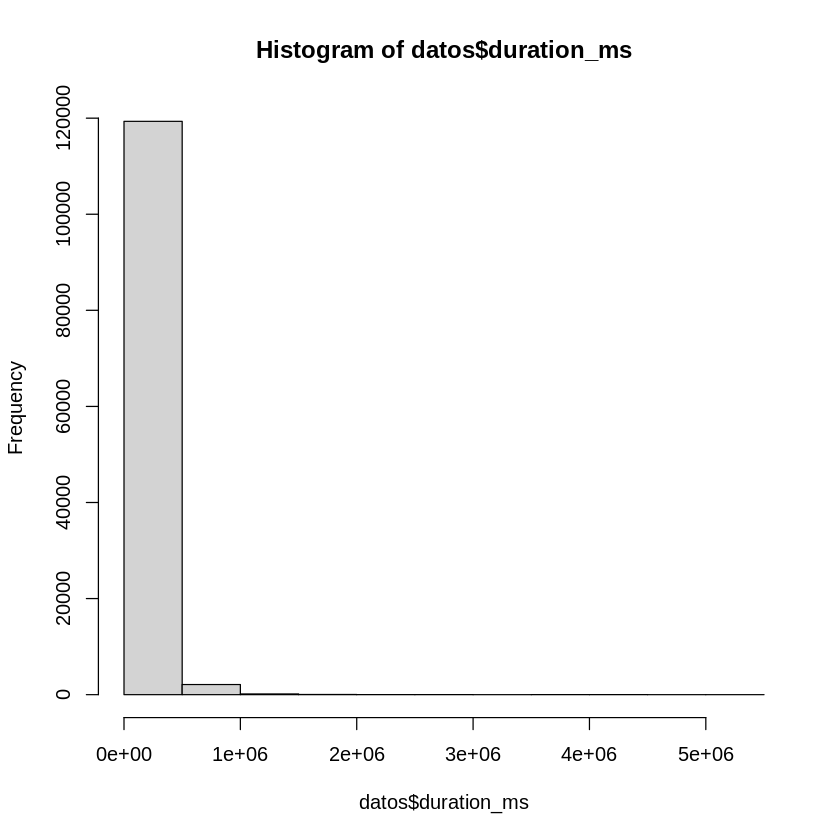

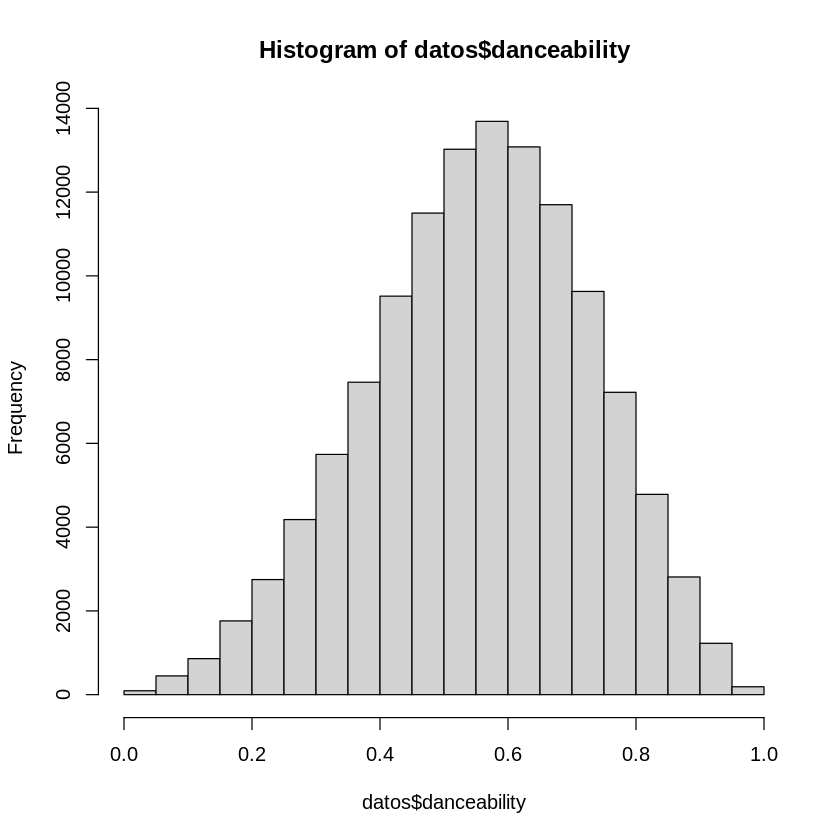

In [21]:
hist(datos$popularity)
hist(datos$energy)
hist(datos$duration_ms)
hist(datos$danceability)

##Filtrado 2018-2020

Después de hacer el filtrado nos quedamos solo con los años 2018-2019-2020 que son los que más nos interesan para el análisis.




In [22]:
#datosRecientes = datos[datos$year >= 2018, ] 
datosRecientes <- datos %>% filter(year >= 2018)
knitr::kable(head(datosRecientes))

#summary(datosRecientes)



| acousticness|artists                                    | danceability| duration_ms| energy| explicit|id                     | instrumentalness| key| liveness| loudness| mode|name           | popularity| speechiness|   tempo| valence| year|
|------------:|:------------------------------------------|------------:|-----------:|------:|--------:|:----------------------|----------------:|---:|--------:|--------:|----:|:--------------|----------:|-----------:|-------:|-------:|----:|
|       0.1370|['David Guetta', 'Bebe Rexha', 'J Balvin'] |        0.703|      198947|  0.660|        0|3MoV1UsAJmz64LHqyiRMp0 |          0.0e+00|  10|   0.1920|   -5.119|    0|Say My Name    |         66|      0.1230|  95.031|   0.790| 2018|
|       0.0893|['6ix9ine', 'Nicki Minaj', 'Kanye West']   |        0.761|      192405|  0.672|        1|5FlmoOiXokZHJvESrFbsyg |          9.8e-06|   1|   0.1400|   -5.887|    1|MAMA           |         68|      0.2120| 160.077|   0.437| 2018|
|       0.2870|['Morgan Wa

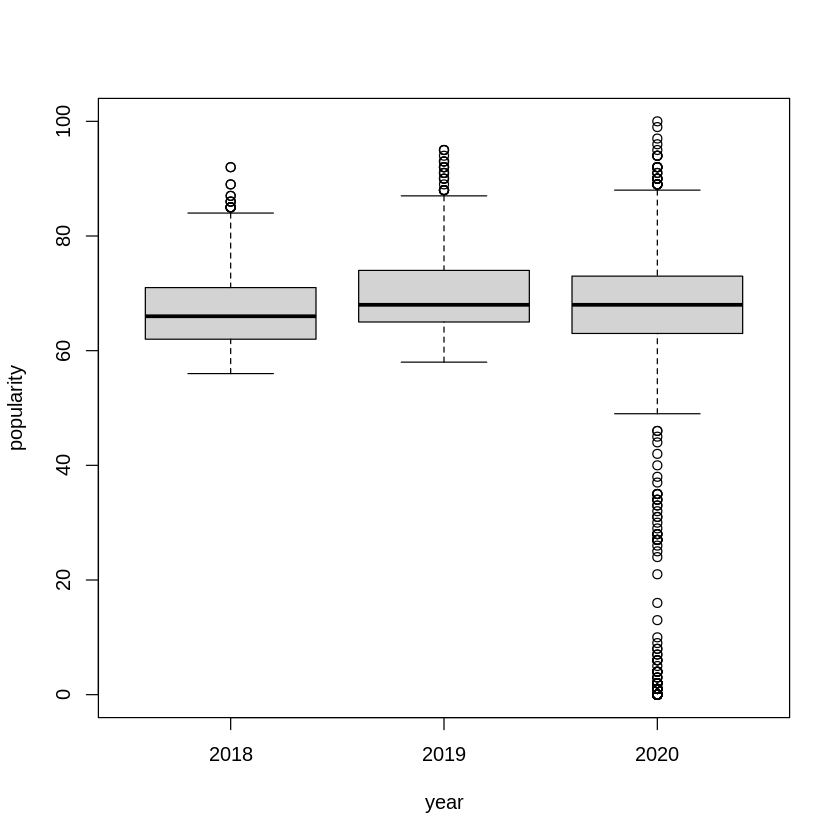

In [23]:
boxplot( formula = popularity~year, data =  datosRecientes)

Matriz de correlación de este caso (2018-2019-2020) para sacar el perfil de canción y las variables más relacionadas. Solo se puede hacer con aquellas columans que tengan valores númericos, por eso tenemos que mover las columnas 

In [24]:
colnames(datosRecientes)

[1] "acousticness"     "artists"          "danceability"     "duration_ms"     
 [5] "energy"           "explicit"         "id"               "instrumentalness"
 [9] "key"              "liveness"         "loudness"         "mode"            
[13] "name"             "popularity"       "speechiness"      "tempo"           
[17] "valence"          "year"

In [25]:
# Ordenamos las columnas para poner las primero los strings y más adelante todos los númericos 
datosRecientes = datosRecientes [ , c(7,2,13,1,3,4,5,6,8,9,10,11,12,14,15,16,17,18)]
knitr::kable(head(datosRecientes))






|id                     |artists                                    |name           | acousticness| danceability| duration_ms| energy| explicit| instrumentalness| key| liveness| loudness| mode| popularity| speechiness|   tempo| valence| year|
|:----------------------|:------------------------------------------|:--------------|------------:|------------:|-----------:|------:|--------:|----------------:|---:|--------:|--------:|----:|----------:|-----------:|-------:|-------:|----:|
|3MoV1UsAJmz64LHqyiRMp0 |['David Guetta', 'Bebe Rexha', 'J Balvin'] |Say My Name    |       0.1370|        0.703|      198947|  0.660|        0|          0.0e+00|  10|   0.1920|   -5.119|    0|         66|      0.1230|  95.031|   0.790| 2018|
|5FlmoOiXokZHJvESrFbsyg |['6ix9ine', 'Nicki Minaj', 'Kanye West']   |MAMA           |       0.0893|        0.761|      192405|  0.672|        1|          9.8e-06|   1|   0.1400|   -5.887|    1|         68|      0.2120| 160.077|   0.437| 2018|
|5x7Fb9wMOtxd7eZzQ9EzVd |[

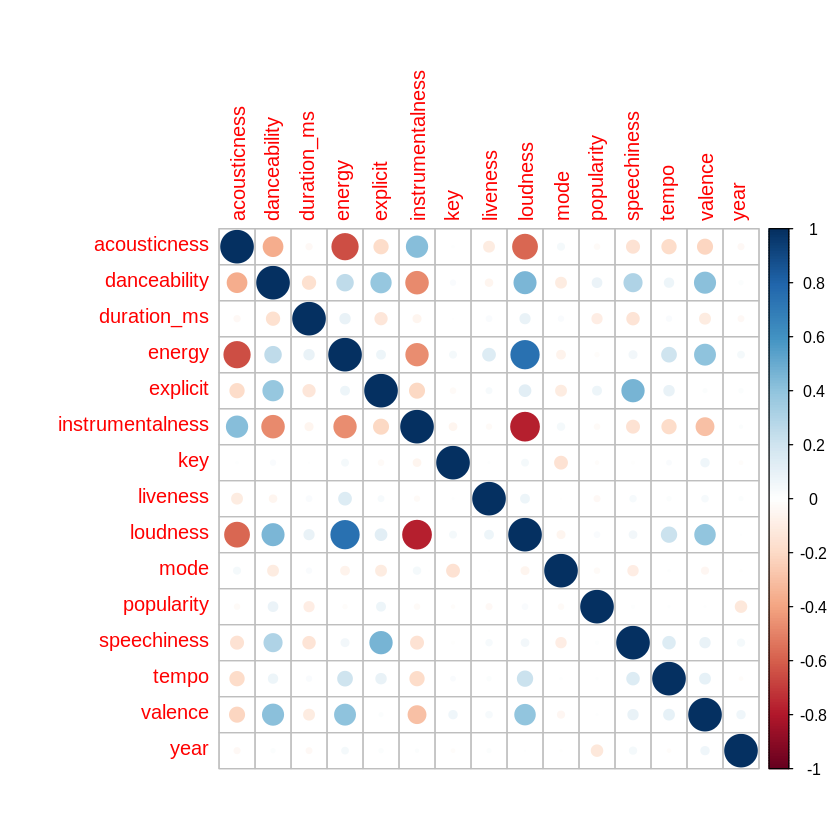

In [26]:
correlationRecientes <- datosRecientes %>% select(acousticness:year)
M <- cor(correlationRecientes) # matriz de correlación 

# “circle”, “square”, “ellipse”, “number”, “shade”, “color”, “pie”
corrplot(M, method = "circle")

RESULTADOS: 

> Nos interesa sobre todo lo que ocurre con la popularidad pero parece que no hay ninguna variable muy relacionada 

> Loudnes está muy conectada con energy pero muy poco relacionada con instrumentalness. 


### Filtrado Poco populares








|Var1 | Freq|
|:----|----:|
|0    |  335|
|1    |  230|

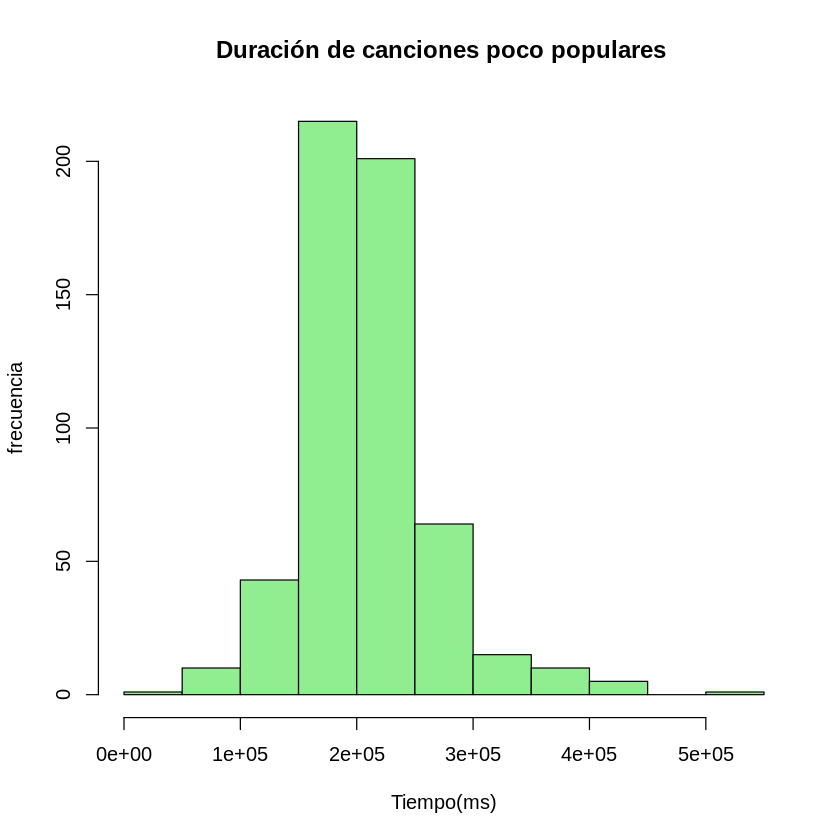

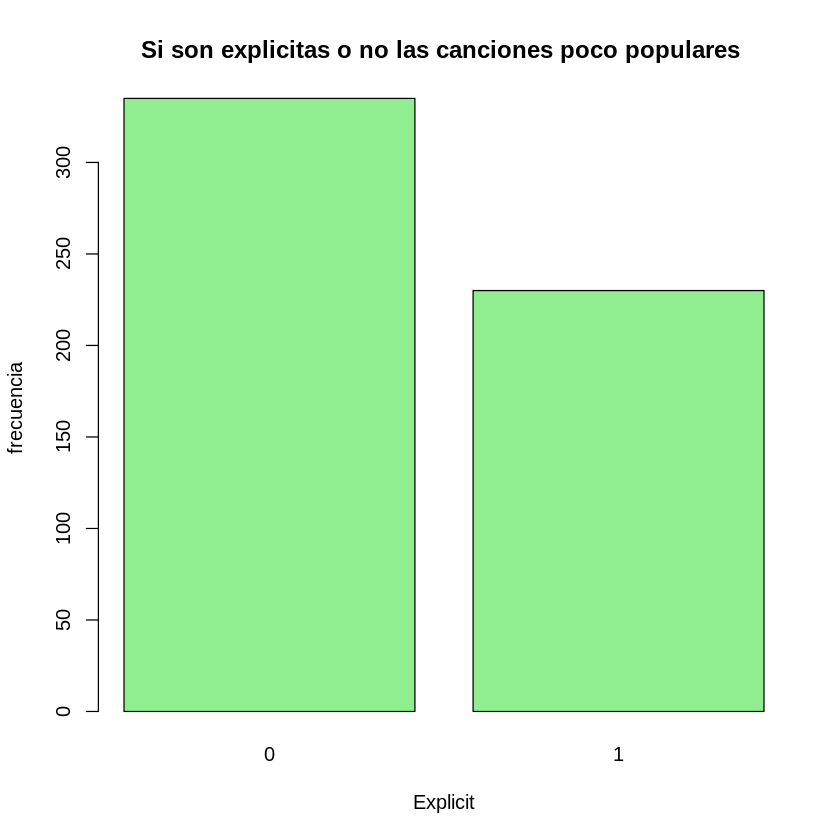

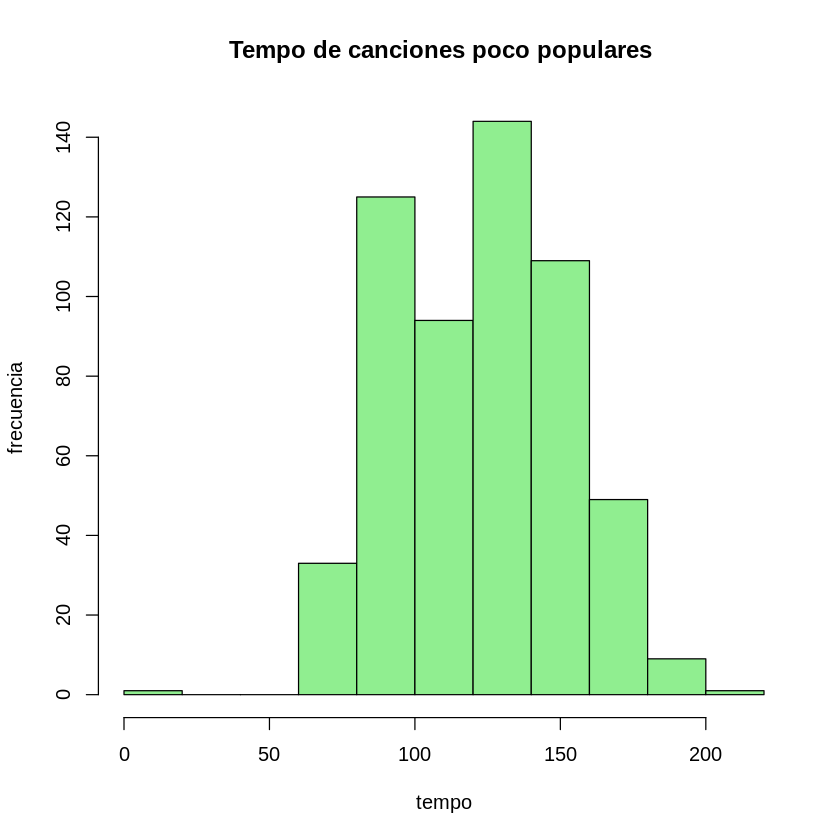

In [235]:
datosPocoPopulares<- datosRecientes %>% filter( popularity <=60)
hist(datosPocoPopulares$duration_ms, 
main = "Duración de canciones poco populares ",
      xlab = "Tiempo(ms)", ylab = "frecuencia",
      col = "lightgreen")

datosExplicitPP <- table(datosPocoPopulares$explicit)
#0 not explicit 
#1 explicit

knitr::kable(head(datosExplicitPP))

## 0 no es explicita y 1 es explicita 
barplot(datosExplicitPP, 
main = "Si son explicitas o no las canciones poco populares ",
      xlab = "Explicit", ylab = "frecuencia",
      col = "lightgreen")

  
hist(datosPocoPopulares$tempo, 
main = "Tempo de canciones poco populares ",
      xlab = "tempo", ylab = "frecuencia",
      col = "lightgreen")


####2020

In [28]:
datos2020PocoPopulares<- datosRecientes %>% filter(year == 2020, popularity <=60)
knitr::kable(head(datos2020PocoPopulares))

"Popularity- Summary"
summary(datos2020PocoPopulares$popularity)




|id                     |artists             |name                         | acousticness| danceability| duration_ms| energy| explicit| instrumentalness| key| liveness| loudness| mode| popularity| speechiness|   tempo| valence| year|
|:----------------------|:-------------------|:----------------------------|------------:|------------:|-----------:|------:|--------:|----------------:|---:|--------:|--------:|----:|----------:|-----------:|-------:|-------:|----:|
|2jLDRXGpa9yJ9fuhySSV8P |['Trey Songz']      |2020 Riots: How Many Times   |       0.0567|        0.546|      204941|  0.608|        1|         0.00e+00|   1|   0.0664|   -6.261|    1|         59|      0.2090|  98.036|   0.370| 2020|
|3Naa5mKj5pbrNGyHsE04zo |['Tame Impala']     |The Less I Know The Better   |       0.0106|        0.622|      218200|  0.784|        1|         8.90e-03|   1|   0.1040|   -3.830|    0|          0|      0.0292| 116.892|   0.780| 2020|
|5JY9u3KjWIGL188kp59Ktn |['Anitta']          |Blá blá blá - Ex

[1] "Popularity- Summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    2.00   20.85   50.75   60.00 

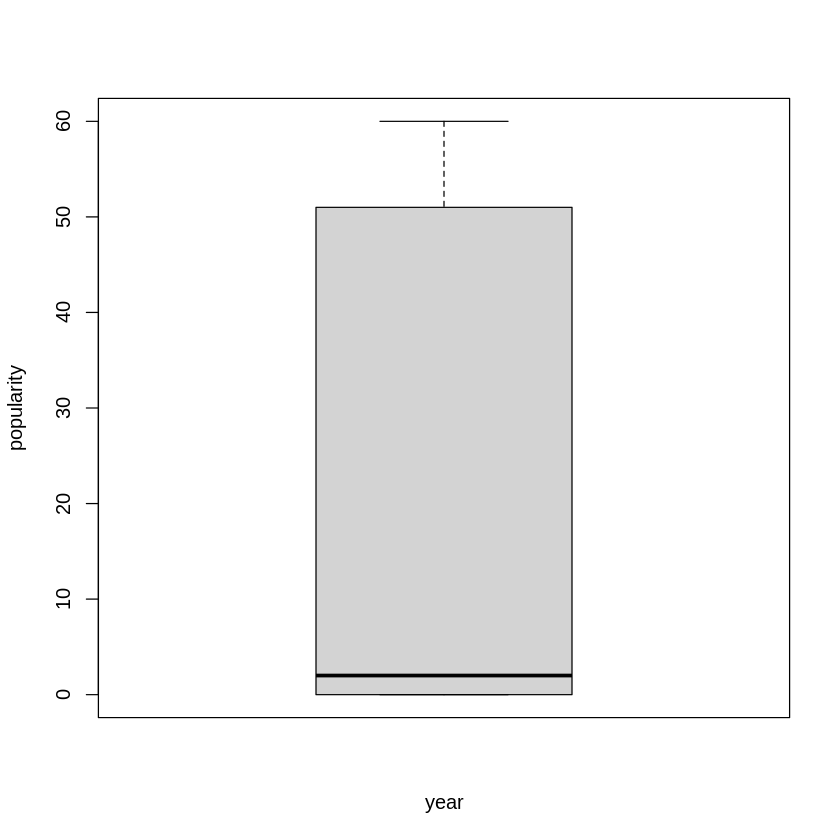

In [29]:
boxplot( formula = popularity~year, data = datos2020PocoPopulares)

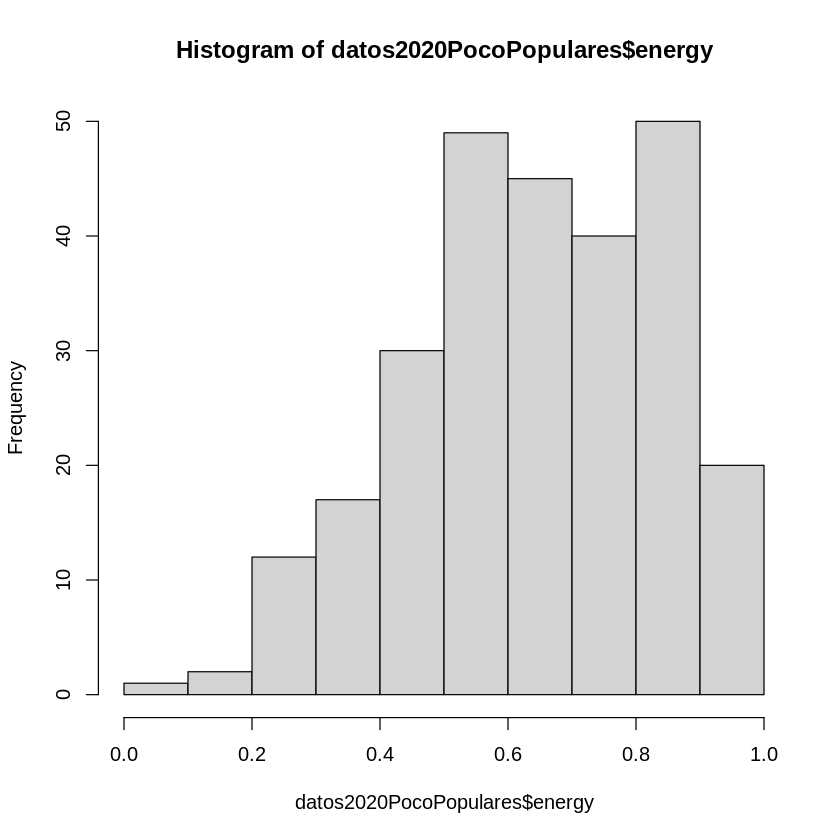

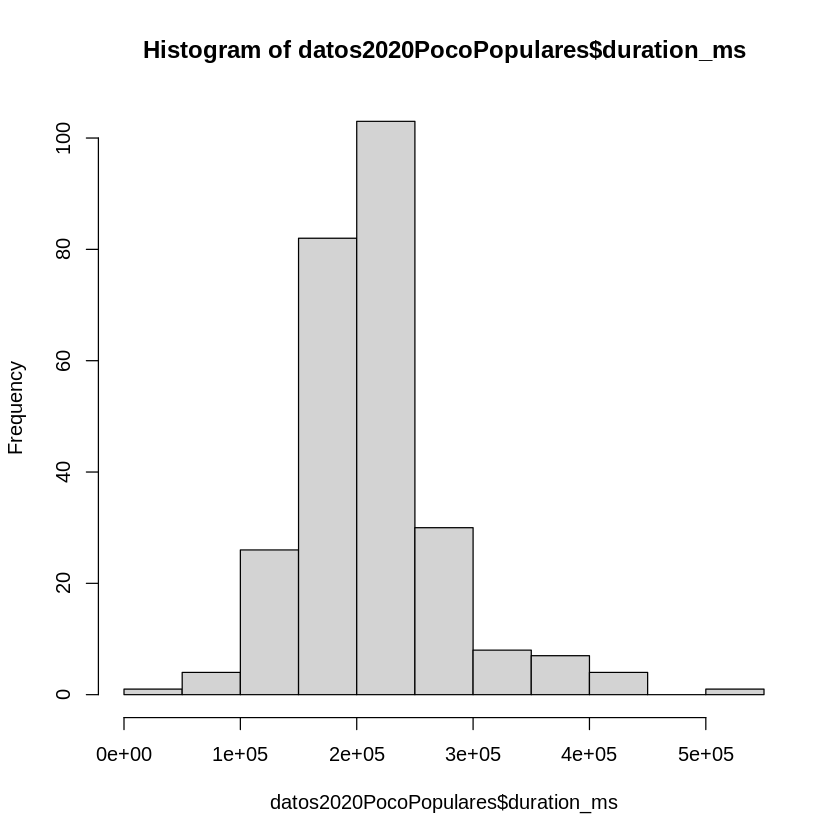

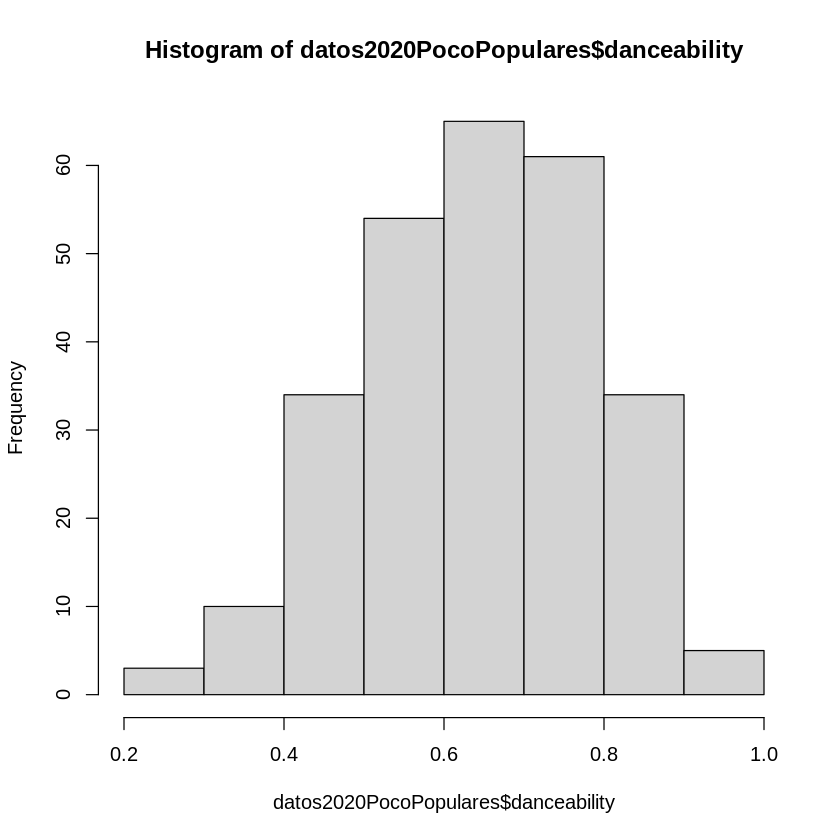

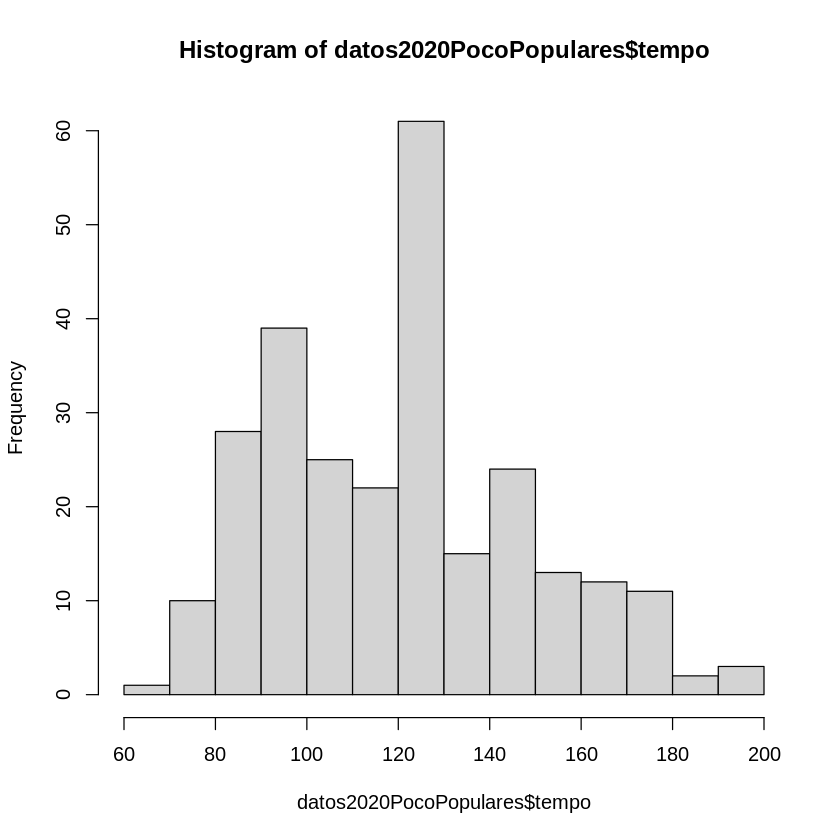

In [30]:
hist(datos2020PocoPopulares$energy)
hist(datos2020PocoPopulares$duration_ms)
hist(datos2020PocoPopulares$danceability)
hist(datos2020PocoPopulares$tempo)


#####Matriz Correlación

[1] "Poco Populares- Summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    2.00   20.85   50.75   60.00 

[1] "Poco Populares- Matriz de correlación"

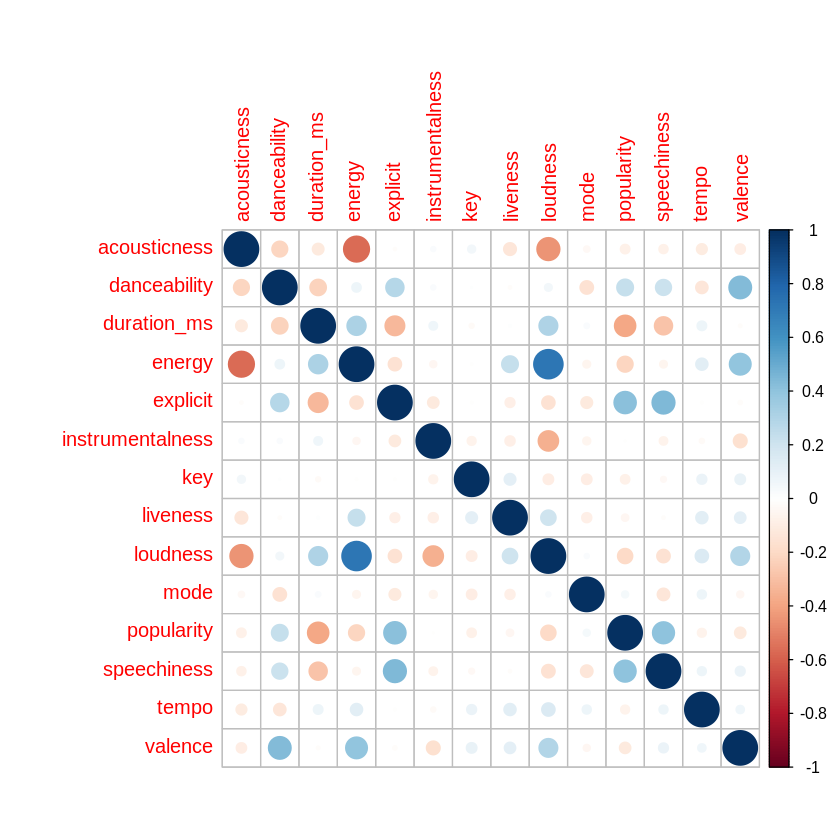

In [31]:

datos2020PocoPopulares<- datosRecientes %>% filter(year == 2020, popularity <=60)
#knitr::kable(head(datos2020PocoPopulares))

"Poco Populares- Summary"

summary(datos2020PocoPopulares$popularity)

"Poco Populares- Matriz de correlación"

correlation2020<- datos2020PocoPopulares %>% select(acousticness:valence)
M <- cor(correlation2020) # matriz de correlación 

# “circle”, “square”, “ellipse”, “number”, “shade”, “color”, “pie”
corrplot(M, method = "circle")


####2019

#####Matriz Correlación

[1] "Poco Populares- Summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  58.00   59.00   60.00   59.61   60.00   60.00 

[1] "Poco Populares- Matriz de correlación"

Warning message in plot.window(...):
“"data" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"data" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"data" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"data" is not a graphical parameter”
Warning message in box(...):
“"data" is not a graphical parameter”
Warning message in title(...):
“"data" is not a graphical parameter”


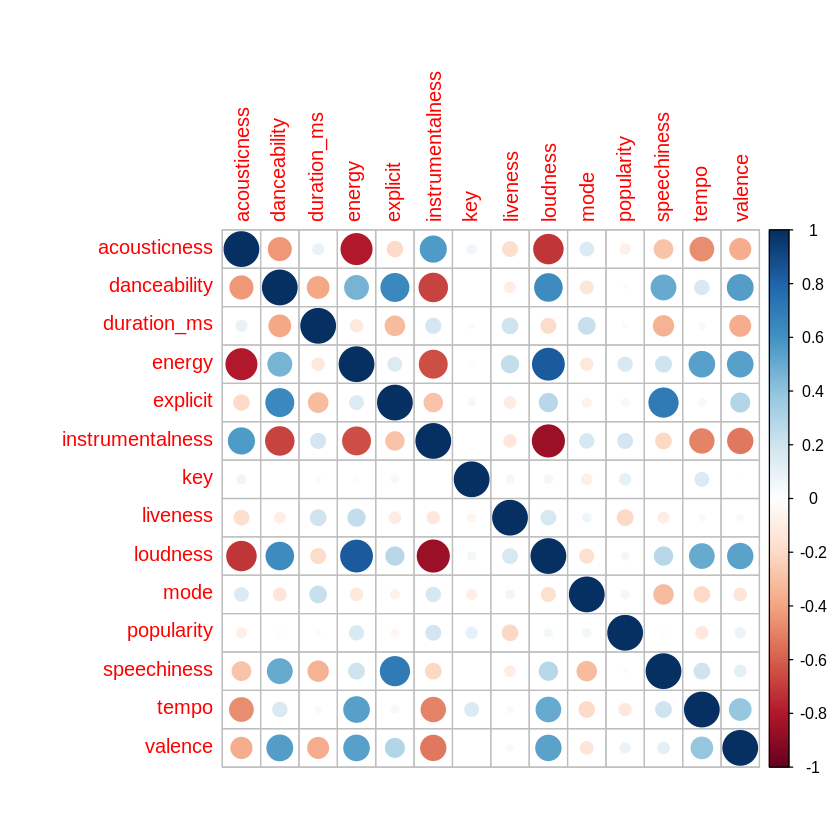

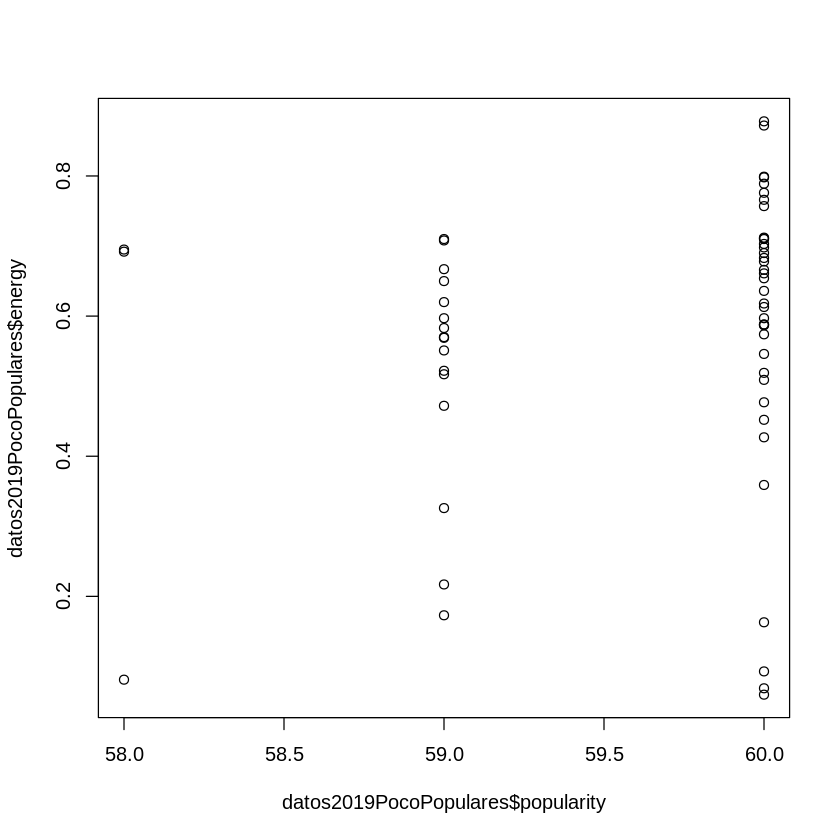

In [32]:
datos2019PocoPopulares<- datosRecientes %>% filter(year == 2019, popularity <=60)
#knitr::kable(head(datos2020PocoPopulares))

"Poco Populares- Summary"

summary(datos2019PocoPopulares$popularity)

"Poco Populares- Matriz de correlación"

correlation2019 <- datos2019PocoPopulares %>% select(acousticness:valence)
M <- cor(correlation2019) # matriz de correlación 

# “circle”, “square”, “ellipse”, “number”, “shade”, “color”, “pie”
corrplot(M, method = "circle")





####2018

#####Matriz Correlación

[1] "Poco Populares- Summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  56.00   58.00   59.00   59.01   60.00   60.00 

[1] "Poco Populares- Matriz de correlación"

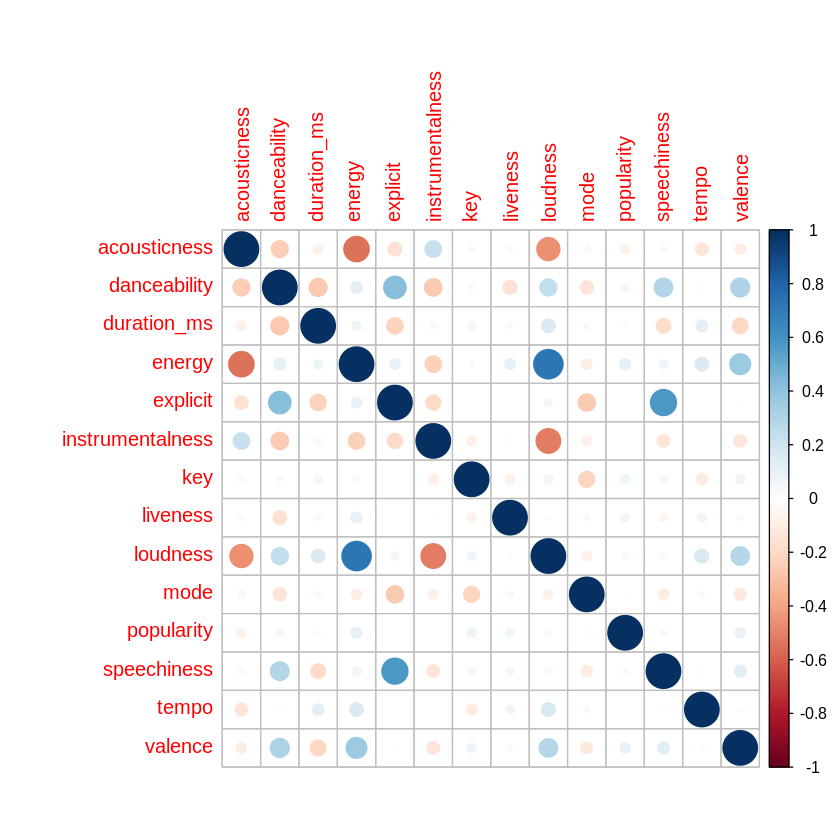

In [33]:
datos2018PocoPopulares<- datosRecientes %>% filter(year == 2018, popularity <=60)
#knitr::kable(head(datos2020PocoPopulares))

"Poco Populares- Summary"

summary(datos2018PocoPopulares$popularity)

"Poco Populares- Matriz de correlación"


correlation2018 <- datos2018PocoPopulares %>% select(acousticness:valence)
M <- cor(correlation2018) # matriz de correlación 

# “circle”, “square”, “ellipse”, “number”, “shade”, “color”, “pie”
corrplot(M, method = "circle")

Recuerdamos que el filtro es para analizar lo que pasa con las canciones de poca popularidad. 

**RESULTADOS**: 
> Son similares a la matriz de correlación de datosRecientes, solo que en este caso también nos muestra algo sobre la popularidad. 
>
> **POPULARIDAD**: 
>>La matriz nos indica que la varibale EXPLICIT está relacionada. 
>>
>>Durtion_ms parece estar poco relacionada
>> 
>>(veremos esto en más profundidad)

[1] 266



|Var1 | Freq|
|:----|----:|
|0    |  199|
|1    |   67|

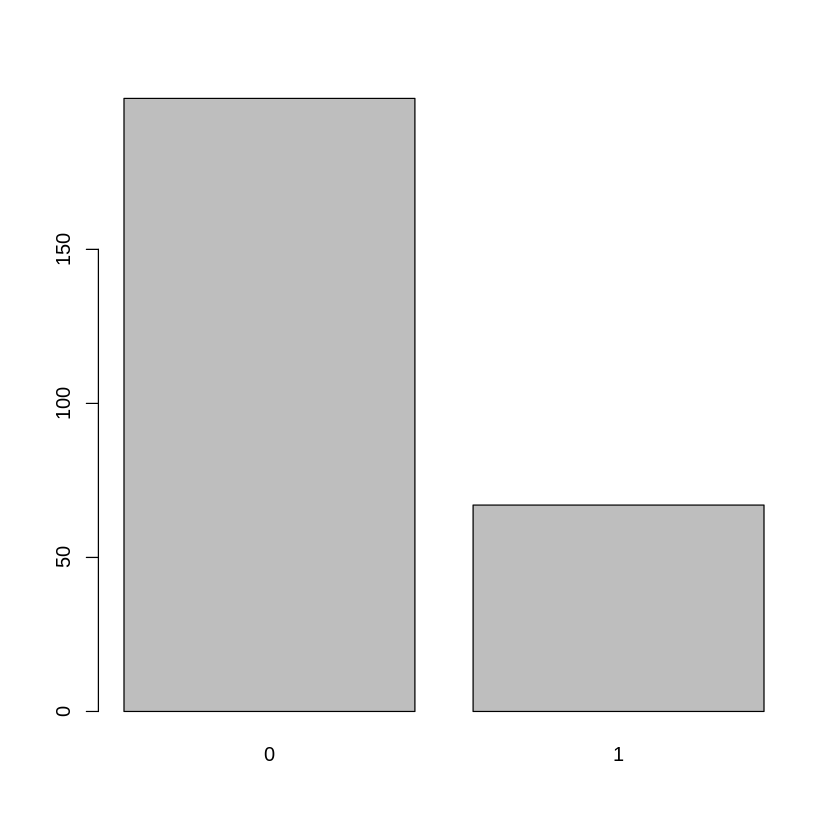

In [34]:
nrow(datos2020PocoPopulares)
# en este dataset contamos con 266 canciones 

datosExplicit <- table(datos2020PocoPopulares$explicit)
#0 not explicit 
#1 explicit

knitr::kable(head(datosExplicit))
barplot(datosExplicit)


#### CLUSTER



Las cancioens muy populares no parecen tenern un patrón muy marcado, es por eso que el cluster lo realizamos de las canciones menos populares de los años 2018-2019-2020 

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
1,0.2643567,0.6665319,200554.7,0.6257713,0.34042553,0.01058855,6.031915,0.1881612,-6.607495,0.7127660,33.02660,0.11801862,122.1632,0.5015803
2,0.2281000,0.6108333,381291.9,0.7583889,0.05555556,0.10974676,4.722222,0.1927056,-6.305667,0.6111111,16.33333,0.08878333,120.9832,0.5071889
3,0.3084950,0.6954609,145586.0,0.5561982,0.67391304,0.02881250,5.184783,0.1783022,-8.152783,0.5543478,47.00000,0.20815217,118.0549,0.4533826
4,0.2625010,0.5698654,252023.7,0.6429144,0.18269231,0.02071597,4.798077,0.1969413,-6.481019,0.6250000,25.17308,0.09770865,124.8335,0.4315442



Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


The following object is masked from ‘package:ggvis’:

    resolution




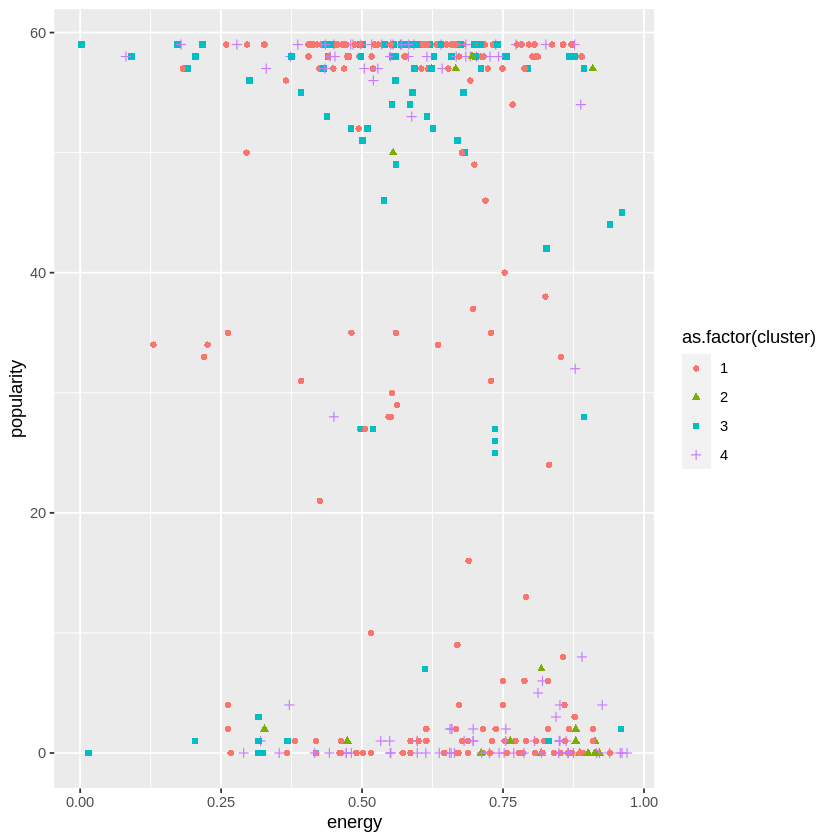

In [35]:
library(cluster)

datosPocoPopulares<- datosRecientes %>% filter( popularity <60)

datosNum <- datosPocoPopulares[c('acousticness','danceability','duration_ms','energy','explicit','instrumentalness','key','liveness','loudness','mode','popularity','speechiness','tempo','valence')]
datosNum <- datosNum[complete.cases(datosNum),]

kc <- kmeans(datosNum, 4)
kc$centers

datosNum$cluster = kc$cluster
library(ggplot2)
ggplot(datosNum, aes(x=energy, y=popularity, col=as.factor(cluster),shape = as.factor(cluster)))+geom_point()



###Filtrado Más populares

####2020

#####Matriz Correlación

[1] "Popularity- Summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  80.00   81.00   84.00   84.77   87.00  100.00 

[1] "¿Cuantas Canciones?"

[1] 168

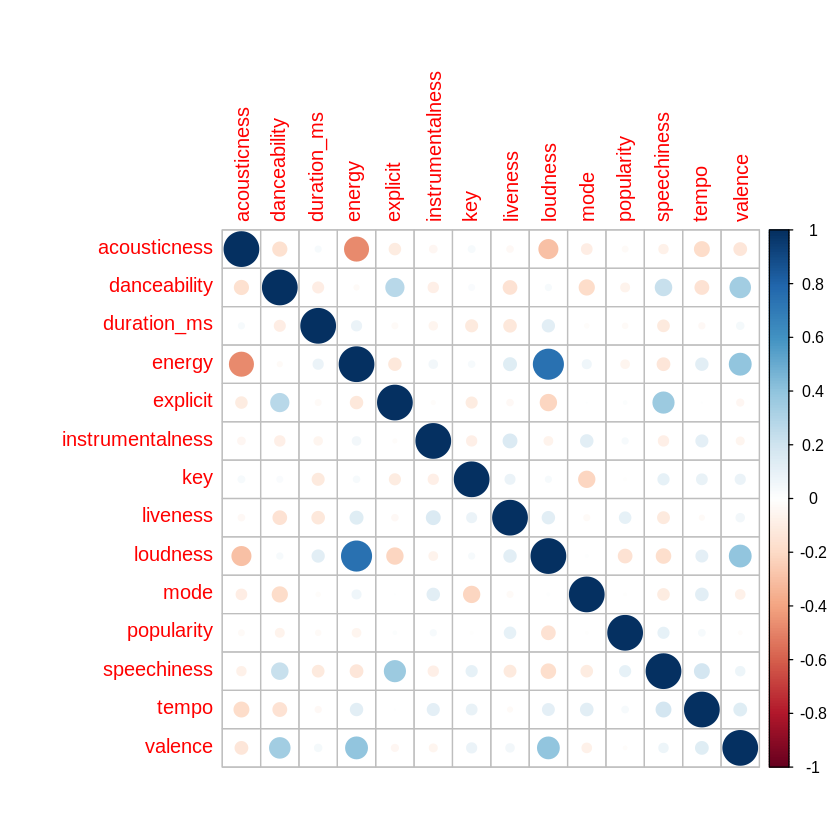

In [36]:
datos2020MasPopulares<- datosRecientes %>% filter(year == 2020, popularity >= 80)
#knitr::kable(head(datos2020MasPopulares))

"Popularity- Summary"
summary(datos2020MasPopulares$popularity)

"¿Cuantas Canciones?" 
nrow(datos2020MasPopulares)

correlation2020MasPopulares<- datos2020MasPopulares %>% select(acousticness:valence)
M <- cor(correlation2020MasPopulares) # matriz de correlación 

# “circle”, “square”, “ellipse”, “number”, “shade”, “color”, “pie”
corrplot(M, method = "circle")


####2019

#####Matriz Correlación

[1] "Popularity- Summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  80.00   81.00   83.00   83.99   86.00   95.00 

[1] "¿Cuantas Canciones?"

[1] 169

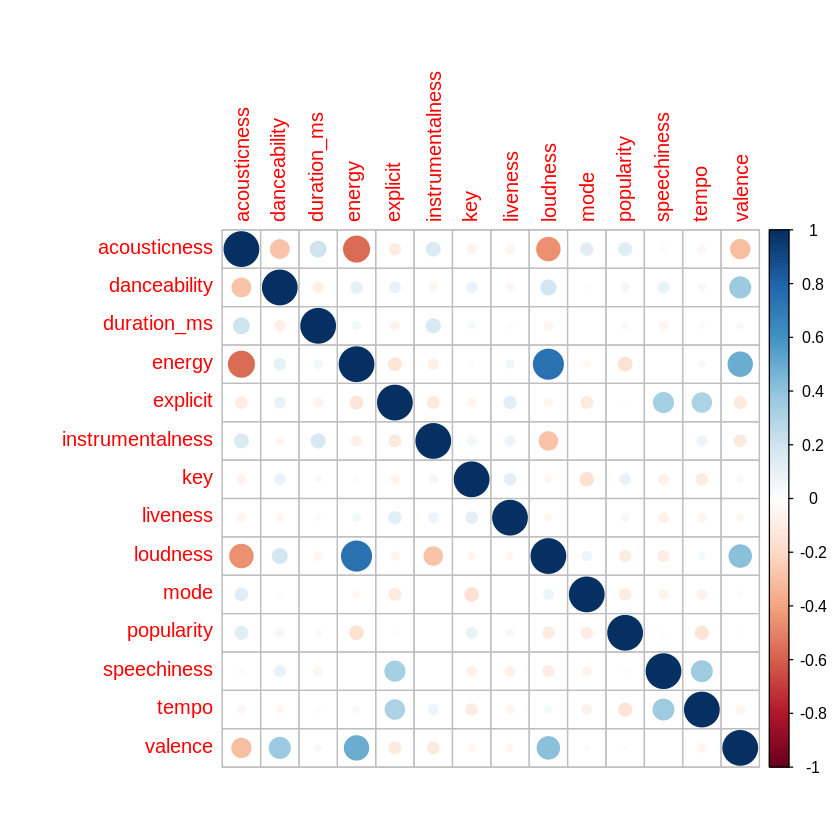

In [37]:
datos2019MasPopulares<- datosRecientes %>% filter(year == 2019, popularity >= 80)
#knitr::kable(head(datos2020MasPopulares))

"Popularity- Summary"
summary(datos2019MasPopulares$popularity)

"¿Cuantas Canciones?" 
nrow(datos2019MasPopulares)

correlation2019MasPopulares<- datos2019MasPopulares %>% select(acousticness:valence)
M <- cor(correlation2019MasPopulares) # matriz de correlación 

# “circle”, “square”, “ellipse”, “number”, “shade”, “color”, “pie”
corrplot(M, method = "circle")


####2018

#####Matriz Correlación

[1] "Popularity- Summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  80.00   81.00   82.00   82.72   84.00   92.00 

[1] "¿Cuantas Canciones?"

[1] 88

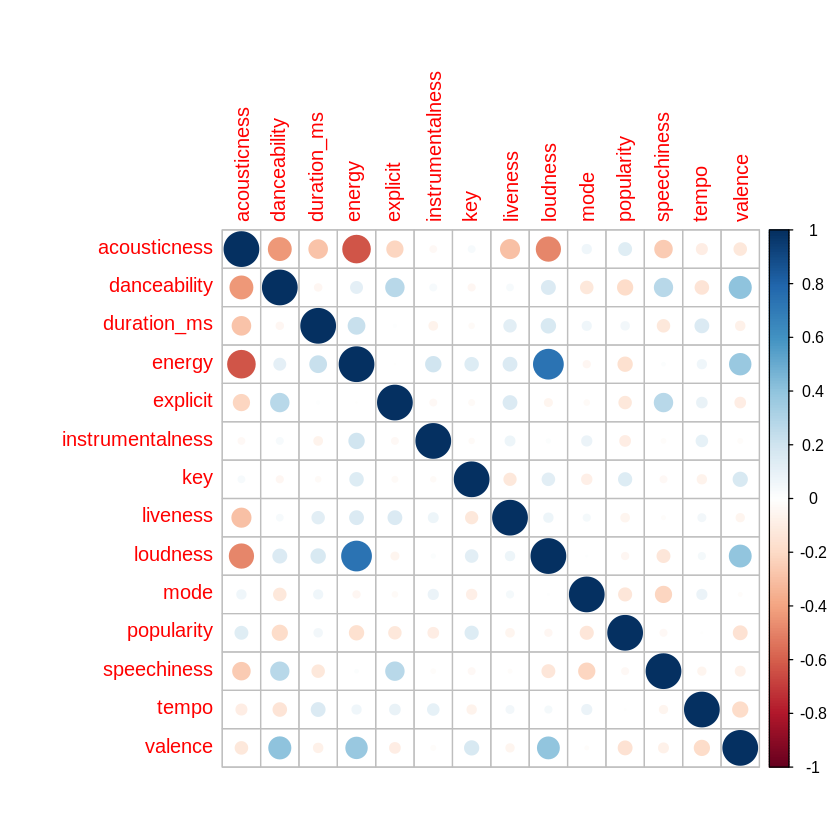

In [38]:
datos2018MasPopulares<- datosRecientes %>% filter(year == 2018, popularity >= 80)
#knitr::kable(head(datos2020MasPopulares))

"Popularity- Summary"
summary(datos2018MasPopulares$popularity)

"¿Cuantas Canciones?" 
nrow(datos2018MasPopulares)

correlation2018MasPopulares<- datos2018MasPopulares %>% select(acousticness:valence)
M <- cor(correlation2018MasPopulares) # matriz de correlación 

# “circle”, “square”, “ellipse”, “number”, “shade”, “color”, “pie”
corrplot(M, method = "circle")

CONLCUSIÓN: No hay muchas relaciones en las matrices de correlación. Las relaciones más destacables son bastante intuitivas es por eso que no podemos ver un patrón marcado en las canciones más populares y buscamos los puntos más destacables de las menos populares. 

##¿Qué tienen en común las canciones favoritas?

Para asegurarnos de que es así y no hay un patrón sacamos el listado de las 5 canciones más populares y observamos sus caracteristicas. 

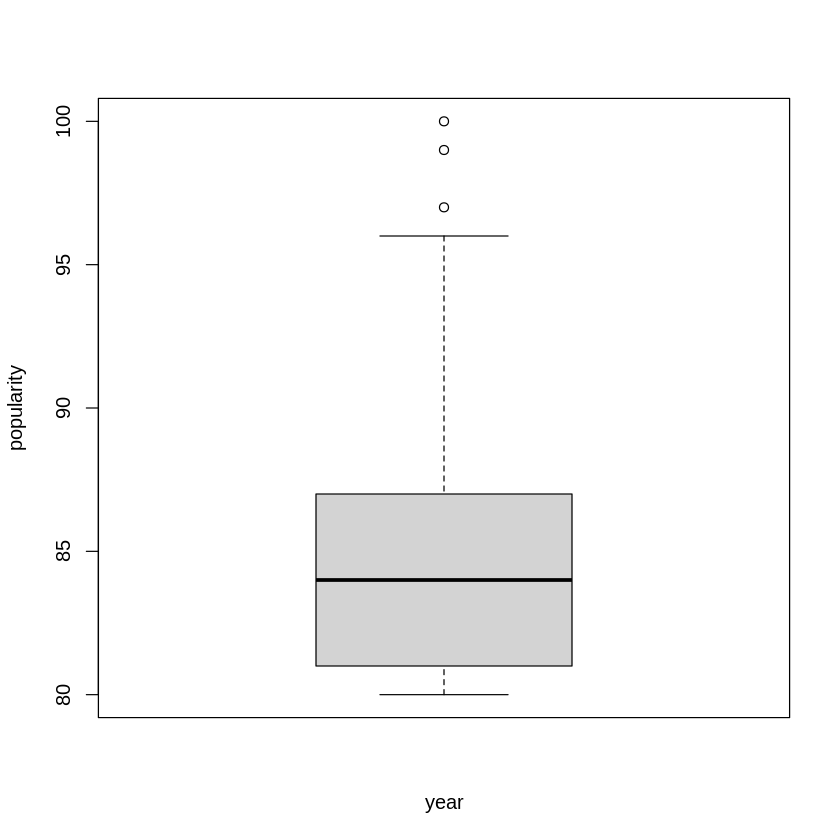

In [39]:
boxplot( formula = popularity~year, data = datos2020MasPopulares)

In [40]:
# sacar esas 3 canciones favoritas (casos "raros" mostrados en el boxplot)
favoritos = datos2020MasPopulares %>% filter(popularity >= 95)
knitr::kable(head(favoritos))



|id                     |artists                                    |name                                                 | acousticness| danceability| duration_ms| energy| explicit| instrumentalness| key| liveness| loudness| mode| popularity| speechiness|   tempo| valence| year|
|:----------------------|:------------------------------------------|:----------------------------------------------------|------------:|------------:|-----------:|------:|--------:|----------------:|---:|--------:|--------:|----:|----------:|-----------:|-------:|-------:|----:|
|7ytR5pFWmSjzHJIeQkgog4 |['DaBaby', 'Roddy Ricch']                  |ROCKSTAR (feat. Roddy Ricch)                         |      0.24700|        0.746|      181733|  0.690|        1|         0.00e+00|  11|   0.1010|   -7.956|    1|         99|      0.1640|  89.977|   0.497| 2020|
|39Yp9wwQiSRIDOvrVg7mbk |['THE SCOTTS', 'Travis Scott', 'Kid Cudi'] |THE SCOTTS                                           |      0.23300|        0.716|    

In [41]:
colnames(datos2020PocoPopulares)

[1] "id"               "artists"          "name"             "acousticness"    
 [5] "danceability"     "duration_ms"      "energy"           "explicit"        
 [9] "instrumentalness" "key"              "liveness"         "loudness"        
[13] "mode"             "popularity"       "speechiness"      "tempo"           
[17] "valence"          "year"

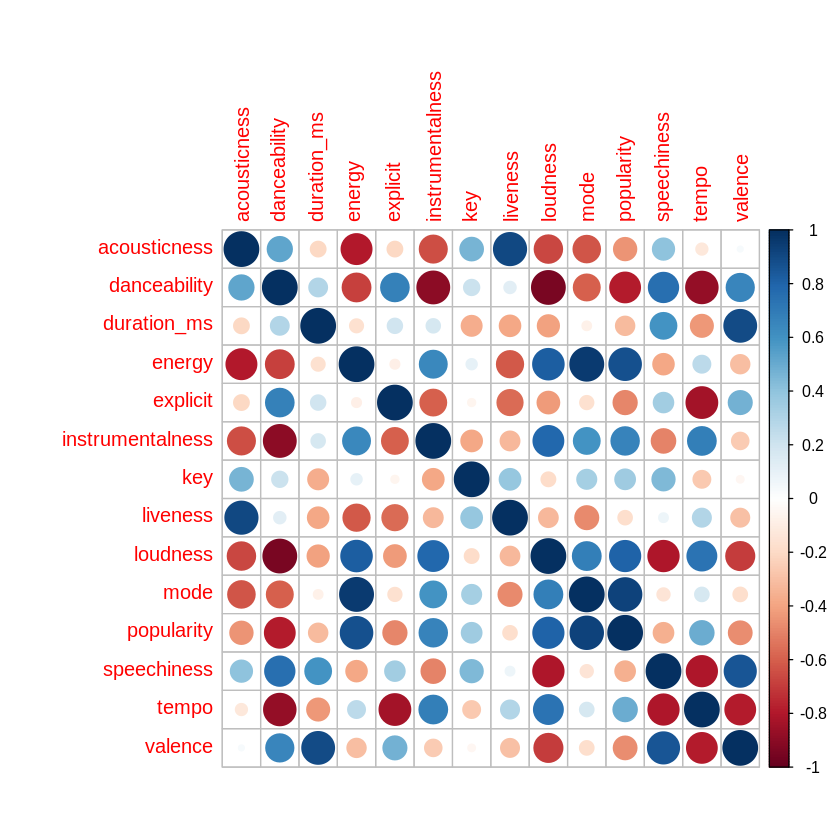

In [42]:
correlation2020Fav<- favoritos %>% select(acousticness:valence)
M <- cor(correlation2020Fav) # matriz de correlación 

# “circle”, “square”, “ellipse”, “number”, “shade”, “color”, “pie”
corrplot(M, method = "circle")


Podríamos decir que estas 5 canciones la popularity está bastante relacionada con la energía de las canciones y el 'loudness' y el 'mode' pero poco relacionado con dancability. 

## Titulos de las canciones

**CONCLUSIÓN GLOBAL:** 
(despúes de realizar el análisis)

Si quieres incrementar la probabilidad de tener exito se recomienda un título de longitud no superior a 3.

Los textos cortos son más populares

El objetivo de este trozo de código es contar las palabras que forman un título. 

Guardamos el resultado en una nueva columan llamada nameCount. 

Ordenamos el dataFrame de forma descendente, es decir, la canción más popular será la primera



|     |name                                                 | popularity| nameCount|
|:----|:----------------------------------------------------|----------:|---------:|
|3059 |Blinding Lights                                      |        100|         2|
|3057 |ROCKSTAR (feat. Roddy Ricch)                         |         99|         5|
|3066 |death bed (coffee for your head) (feat. beabadoobee) |         97|         9|
|3058 |THE SCOTTS                                           |         96|         2|
|2957 |The Box                                              |         95|         2|
|2961 |Supalonely                                           |         95|         1|
|2969 |ily (i love you baby) (feat. Emilee)                 |         95|         8|
|3063 |Toosie Slide                                         |         95|         2|
|2975 |Dance Monkey                                         |         94|         2|
|3060 |Party Girl                                           |  

'data.frame':	1596 obs. of  3 variables:
 $ Var1: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Var2: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Freq: int  13 11 1 0 1 0 2 0 0 0 ...




| Var1| Var2| Freq|
|----:|----:|----:|
|    1|    1|   13|
|    2|    1|   11|
|    3|    1|    1|
|    4|    1|    0|
|    5|    1|    1|
|    6|    1|    0|
|    7|    1|    2|
|    8|    1|    0|
|    9|    1|    0|
|   10|    1|    0|
|   11|    1|    1|
|   12|    1|    1|
|   13|    1|    0|
|   14|    1|    0|
|   15|    1|    0|
|   16|    1|    0|
|   17|    1|    0|
|   18|    1|    3|
|   19|    1|    0|
|   20|    1|    0|

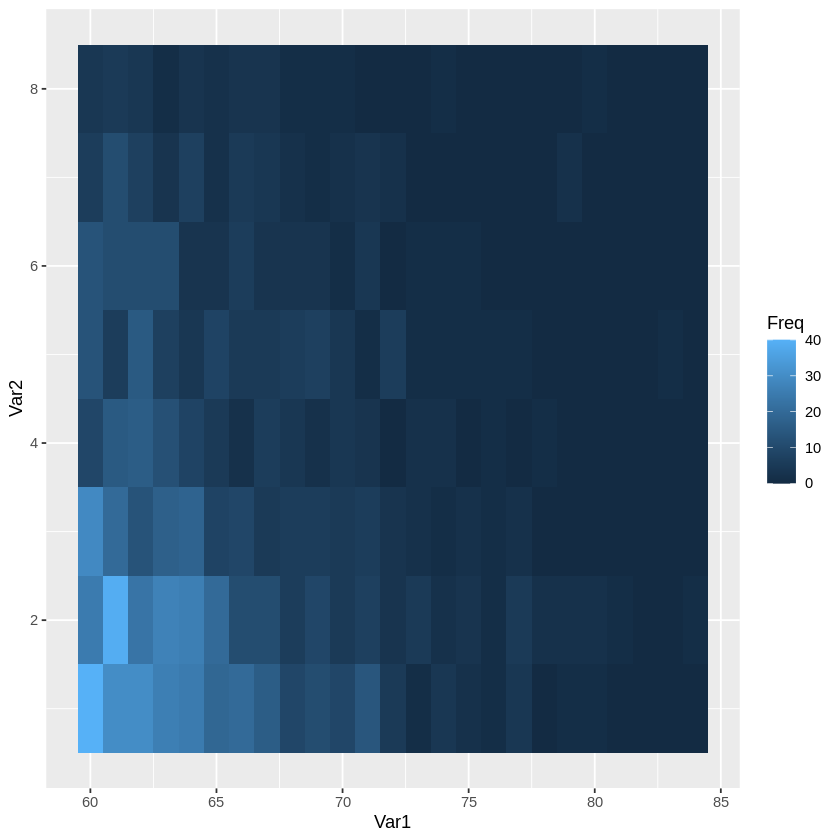

In [230]:
titulosPopularidad <- (datosRecientes[,c("name", "popularity")])
count <- sapply(gregexpr("\\W+", titulosPopularidad$name), function(x) sum(x>0) ) + 1 
titulosPopularidad$nameCount <- count
#summary(titulosPopularidad)
#knitr::kable(head(titulosPopularidad))

titulosPopularidad <- titulosPopularidad[order(-titulosPopularidad$popularity),] 
knitr::kable(head(titulosPopularidad, 20))


titulos <- table(titulosPopularidad$popularity, titulosPopularidad$nameCount)

titulosMD <- as.data.frame(titulos)
titulosMD$Var1 <- as.integer(titulosMD$Var1)
titulosMD$Var2 <- as.integer(titulosMD$Var2)
titulosMD$Freq <- as.integer(titulosMD$Freq)
str(titulosMD)
knitr::kable(head(titulosMD, 20))
titulosMDF <- titulosMD %>% filter(Var1 >= 60, Var2 <= 8)

ggplot(data = titulosMDF, aes(x=Var1, y=Var2, fill=Freq)) + 
  geom_tile()




La mayoria de las canciones en general tienen titulos cortos. Podemos intuir en este grafíco que a medida que la popularidad crece menos canciones con titulos largos tenemos. El problema de esta visualzacióne es que hay pocas canciones exitosas comparadas con la cantidad de canciones que tenemos con un 60 de popularidad. Si hacemos el mismo grafico solo para las más populares: 


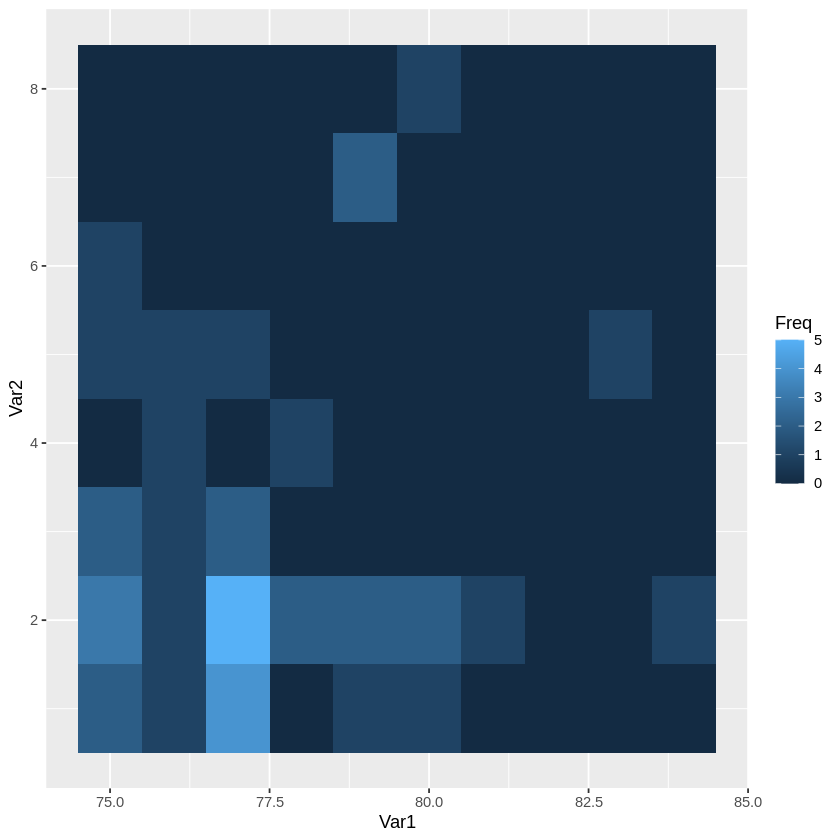

In [232]:

titulosMDF2 <- titulosMD %>% filter(Var1 >= 75, Var2 <= 8)

ggplot(data = titulosMDF2, aes(x=Var1, y=Var2, fill=Freq)) + 
  geom_tile()

Vemos un poco más clasro que si hay titulos largos populares pero la mayoría estan en la parte baja del eje Y con menos de 4 palabras 

###Las canciones más populares



Filtramos los datos de 2018-2019-2020 y nos quedamos solo con las cacniones que tengan una popularidad superior o igual a 75

In [44]:
titulosMasPopularidad <- titulosPopularidad %>% filter(popularity >= 75)
##summary(titulosPopularidad)
##str(titulosPopularidad)
##knitr::kable(head(titulosPopularidad,20))

"¿Cuantas Canciones?" 
nrow(titulosMasPopularidad)

[1] "¿Cuantas Canciones?"

[1] 1049

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   3.413   5.000  15.000 

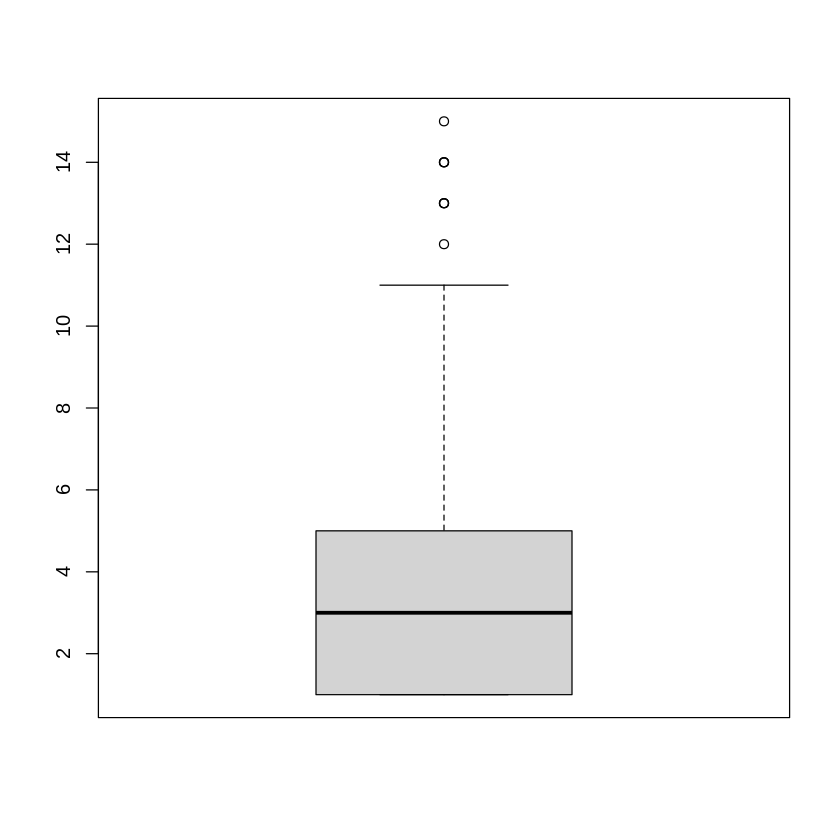

In [45]:
summary(titulosMasPopularidad$nameCount)
boxplot(titulosMasPopularidad$nameCount)

####Títulos largos

In [46]:
titulosLargos <- titulosMasPopularidad %>% filter(nameCount >= 7)
"¿Cuantas canciones con titulos largos?" 
nrow(titulosLargos)

summary(titulosLargos)
# cambiando 10 a 22 se mostrarán todas las canciones
knitr::kable(head(titulosLargos,10))



[1] "¿Cuantas canciones con titulos largos?"

[1] 132

                                                 name       popularity   
 I Don't Care (with Justin Bieber)                 :  2   Min.   :75.00  
 Rain On Me (with Ariana Grande)                   :  2   1st Qu.:76.00  
 The London (feat. J. Cole & Travis Scott)         :  2   Median :78.00  
 ...And To Those I Love, Thanks For Sticking Around:  1   Mean   :79.33  
 10 Freaky Girls (with 21 Savage)                  :  1   3rd Qu.:81.00  
 10,000 Hours (with Justin Bieber)                 :  1   Max.   :97.00  
 (Other)                                           :123                  
   nameCount     
 Min.   : 7.000  
 1st Qu.: 7.000  
 Median : 8.000  
 Mean   : 8.318  
 3rd Qu.: 9.000  
 Max.   :15.000  
                 



|name                                                 | popularity| nameCount|
|:----------------------------------------------------|----------:|---------:|
|death bed (coffee for your head) (feat. beabadoobee) |         97|         9|
|ily (i love you baby) (feat. Emilee)                 |         95|         8|
|Rain On Me (with Ariana Grande)                      |         94|         7|
|Stuck with U (with Justin Bieber)                    |         94|         7|
|If the World Was Ending - feat. Julia Michaels       |         89|         8|
|10,000 Hours (with Justin Bieber)                    |         87|         7|
|Rain On Me (with Ariana Grande)                      |         87|         7|
|Sunflower - Spider-Man: Into the Spider-Verse        |         86|         7|
|Bandit (with YoungBoy Never Broke Again)             |         86|         7|
|I’m Ready (with Demi Lovato)                         |         86|         7|

CONCLUSIÓN

Los titulos más largos no tienen una popularidad superior a 90. Es cierto que son pocas las canciones que contienen titulos con más de 10 palabas y que la mayoría de estas indican datos como artistas o película/serie en la que aparece. 


####Titulos cortos

[1] "¿Cuantas canciones con titulos cortos?"

[1] 749

              name       popularity       nameCount    
 Adore You      :  2   Min.   : 75.00   Min.   :1.000  
 Be Alright     :  2   1st Qu.: 76.00   1st Qu.:1.000  
 Before You Go  :  2   Median : 79.00   Median :2.000  
 Black Swan     :  2   Mean   : 79.77   Mean   :2.092  
 Blanco         :  2   3rd Qu.: 82.00   3rd Qu.:3.000  
 Blueberry Faygo:  2   Max.   :100.00   Max.   :4.000  
 (Other)        :737                                   



|name            | popularity| nameCount|
|:---------------|----------:|---------:|
|Blinding Lights |        100|         2|
|THE SCOTTS      |         96|         2|
|The Box         |         95|         2|
|Supalonely      |         95|         1|
|Toosie Slide    |         95|         2|
|Dance Monkey    |         94|         2|
|Party Girl      |         94|         2|
|GOOBA           |         94|         1|
|Sunday Best     |         93|         2|
|Say So          |         93|         2|



|Popularity |NameCount | Count|
|:----------|:---------|-----:|
|75         |1         |    40|
|76         |1         |    30|
|77         |1         |    30|
|78         |1         |    26|
|79         |1         |    25|
|80         |1         |    19|
|81         |1         |    20|
|82         |1         |    16|
|83         |1         |     9|
|84         |1         |    11|

[1] 268

[1] 236

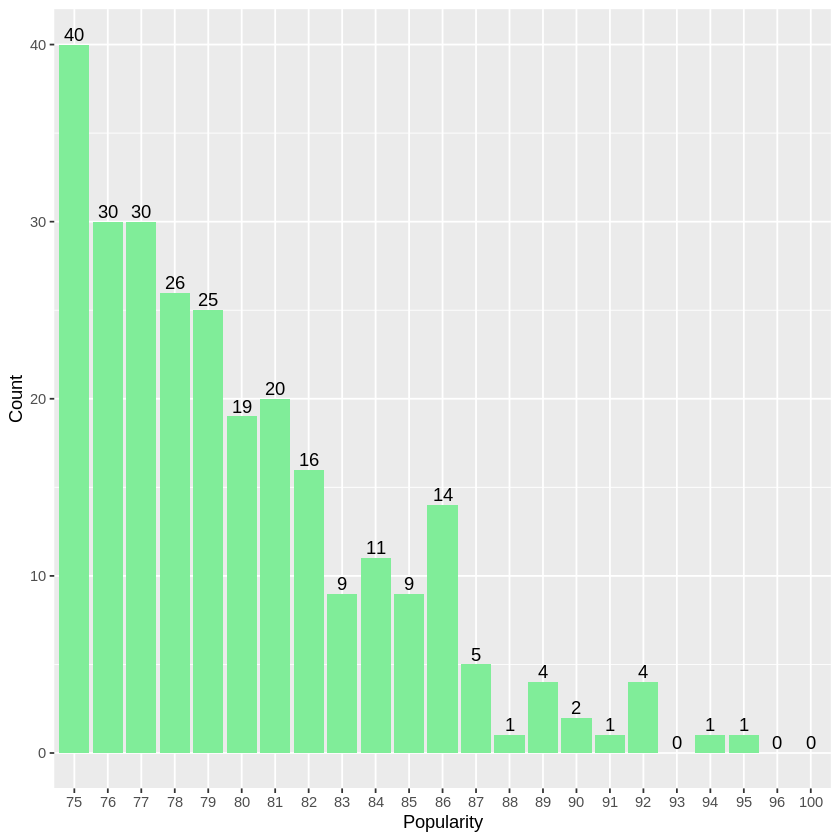

[1] 153

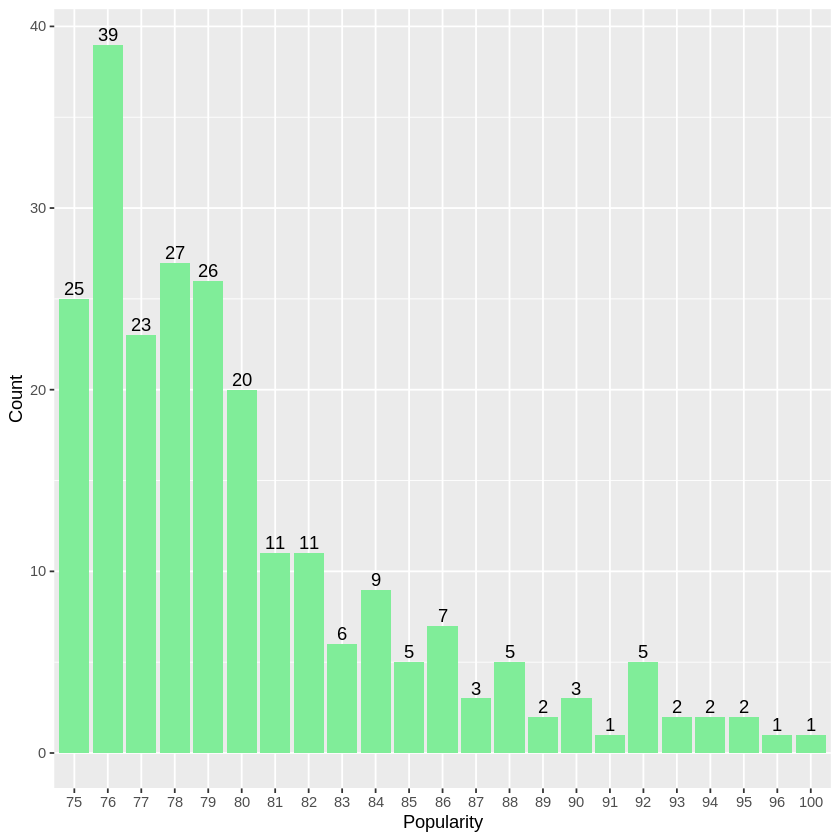

[1] 92

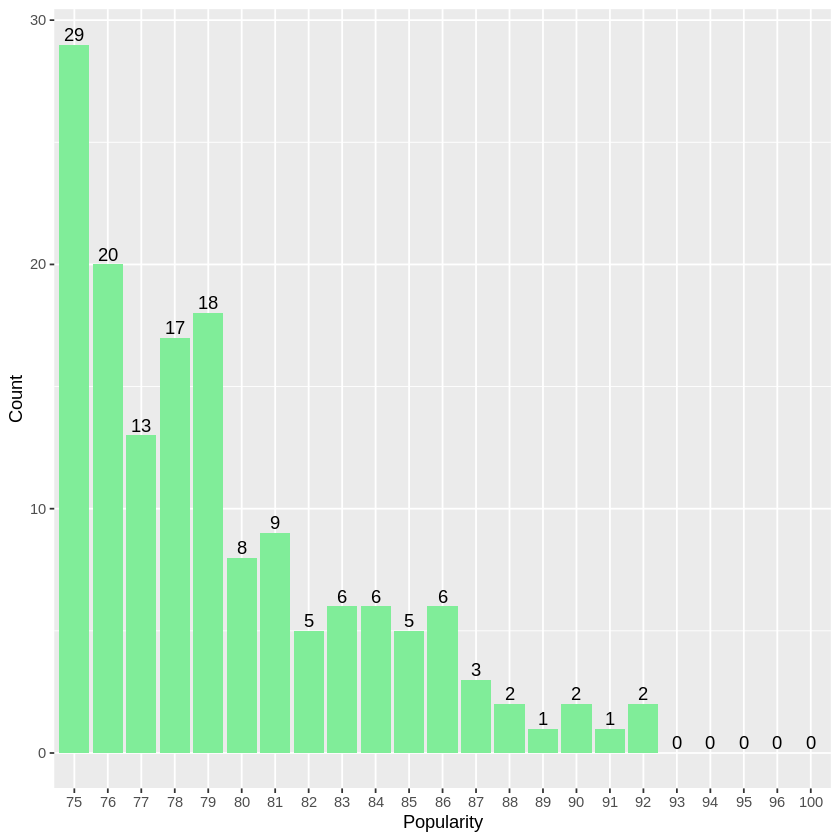

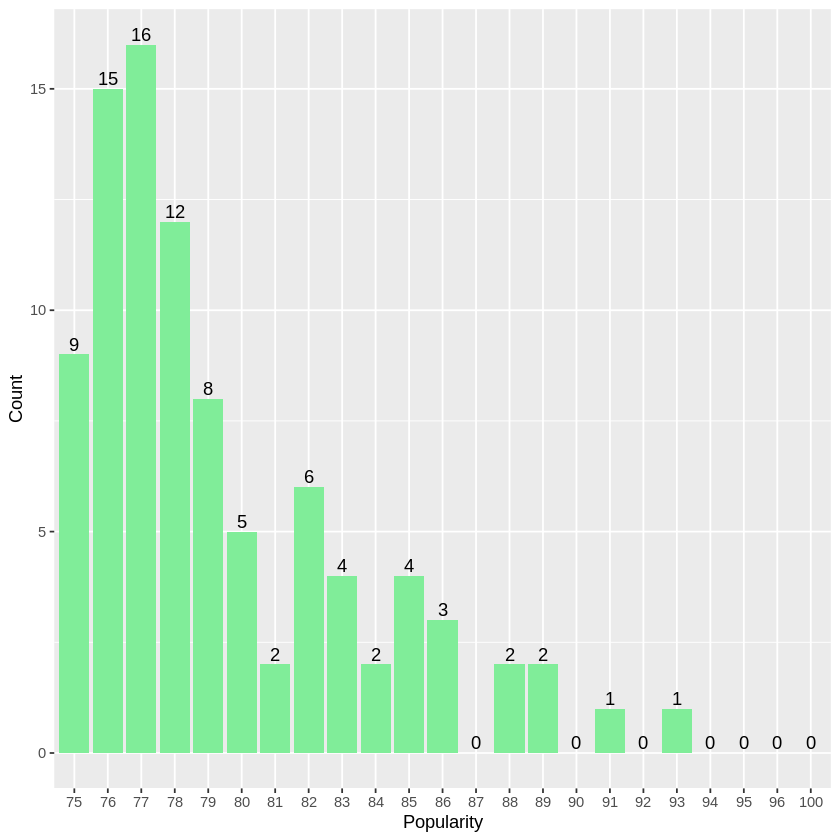

In [188]:
titulosCortos <- titulosMasPopularidad %>% filter(nameCount <= 4)
"¿Cuantas canciones con titulos cortos?" 
nrow(titulosCortos)

summary(titulosCortos)
# cambiando 10 a 22 se mostrarán todas las canciones
knitr::kable(head(titulosCortos,10))

tCortos<- table(titulosCortos$popularity, titulosCortos$nameCount)
tCortos <- data.frame(hola) 



tCortos <- setNames(tCortos, c("Popularity","NameCount","Count"))
knitr::kable(head(tCortos,10))

#"Total canciones popularescon 1 palabra"
sum(tCortos1$Count)
##268

tCortos1 <- tCortos %>% filter(NameCount == 1 )
ggplot(tCortos1, aes(x = Popularity, y = Count)) +
  geom_bar(fill = "#80ed99", stat = "identity") + 
    geom_text(aes(label = Count), vjust = -0.3) 

#"Total canciones populares con 2 palabras"
sum(tCortos2$Count)
## 236
tCortos2 <- tCortos %>% filter(NameCount == 2 )
ggplot(tCortos2, aes(x = Popularity, y = Count)) +
  geom_bar(fill = "#80ed99", stat = "identity") + 
    geom_text(aes(label = Count), vjust = -0.3) 

#"Total canciones populares con 3 palabras"
sum(tCortos3$Count)
#153

  tCortos3 <- tCortos %>% filter(NameCount == 3 )
ggplot(tCortos3, aes(x = Popularity, y = Count)) +
  geom_bar(fill = "#80ed99", stat = "identity") +
    geom_text(aes(label = Count), vjust = -0.3) 

#"Total canciones populares con 4 palabras"
sum(tCortos4$Count)
# 92
  tCortos4 <- tCortos %>% filter(NameCount == 4 )
ggplot(tCortos4, aes(x = Popularity, y = Count)) +
  geom_bar(fill = "#80ed99", stat = "identity")+
  geom_text(aes(label = Count), vjust = -0.3) 

CONCLUSIÓN: 

Tenemos muchas más canciones con titulos cortos, unas 500. 

Las canciones con titulos de longitud 1-2 palabras tienen tendencia a ser más populares. 

###Las canciones menos populares

In [48]:
titulosMenosPopularidad <- titulosPopularidad %>% filter(popularity < 60)
##summary(titulosPopularidad)
##str(titulosPopularidad)
##knitr::kable(head(titulosPopularidad))

"¿Cuantas Canciones?" 
nrow(titulosMenosPopularidad)

[1] "¿Cuantas Canciones?"

[1] 402

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    3.00    3.47    5.00   18.00 

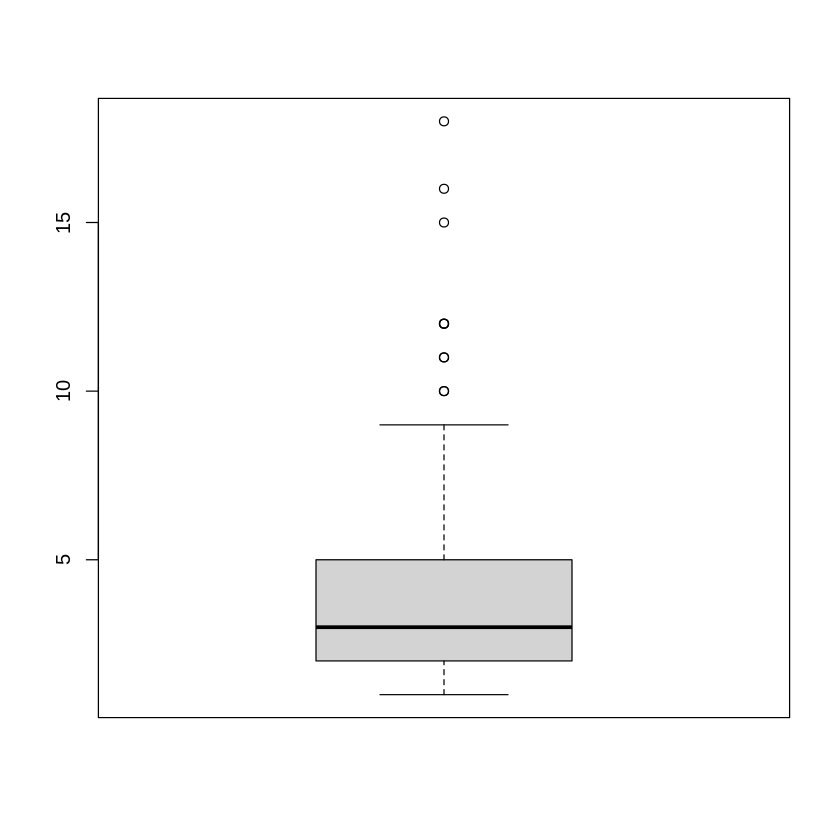

In [49]:
summary(titulosMenosPopularidad$nameCount)
boxplot(titulosMenosPopularidad$nameCount)

####Titulos Largos

[1] "¿Cuantas canciones con titulos largos?"

[1] 14

                                                                          name  
 I Choose - From The Netflix Original Film The Willoughbys / MK Remix       :2  
 (Everything I Do) I Do It For You - 2017 Ultimate Edit                     :1  
 Everything I Did to Get to You (from Songland)                             :1  
 Fan Noises for Sleeping (Looped, Loopable Fast Sleep)                      :1  
 Good Things Fall Apart vs. Sad Songs (With Said The Sky feat. Annika Wells):1  
 Gorgeous vs. All Together (feat. Bipolar Sunshine & OEKIIN)                :1  
 (Other)                                                                    :7  
   popularity      nameCount    
 Min.   : 0.00   Min.   : 9.00  
 1st Qu.: 7.00   1st Qu.: 9.25  
 Median :31.00   Median :11.00  
 Mean   :30.86   Mean   :11.64  
 3rd Qu.:55.25   3rd Qu.:12.00  
 Max.   :59.00   Max.   :18.00  
                                



|name                                                                                              | popularity| nameCount|
|:-------------------------------------------------------------------------------------------------|----------:|---------:|
|Fan Noises for Sleeping (Looped, Loopable Fast Sleep)                                             |         59|         9|
|Everything I Did to Get to You (from Songland)                                                    |         58|        10|
|I Choose - From The Netflix Original Film The Willoughbys / MK Remix                              |         57|        11|
|That's On Me (feat. 2 Chainz, T.I., Rich The Kid, Jeezy, Boosie Badazz & Trapboy Freddy) - Remix  |         57|        18|
|Good Things Fall Apart vs. Sad Songs (With Said The Sky feat. Annika Wells)                       |         50|        15|
|Gorgeous vs. All Together (feat. Bipolar Sunshine & OEKIIN)                                       |         45|         9|
|VULTU

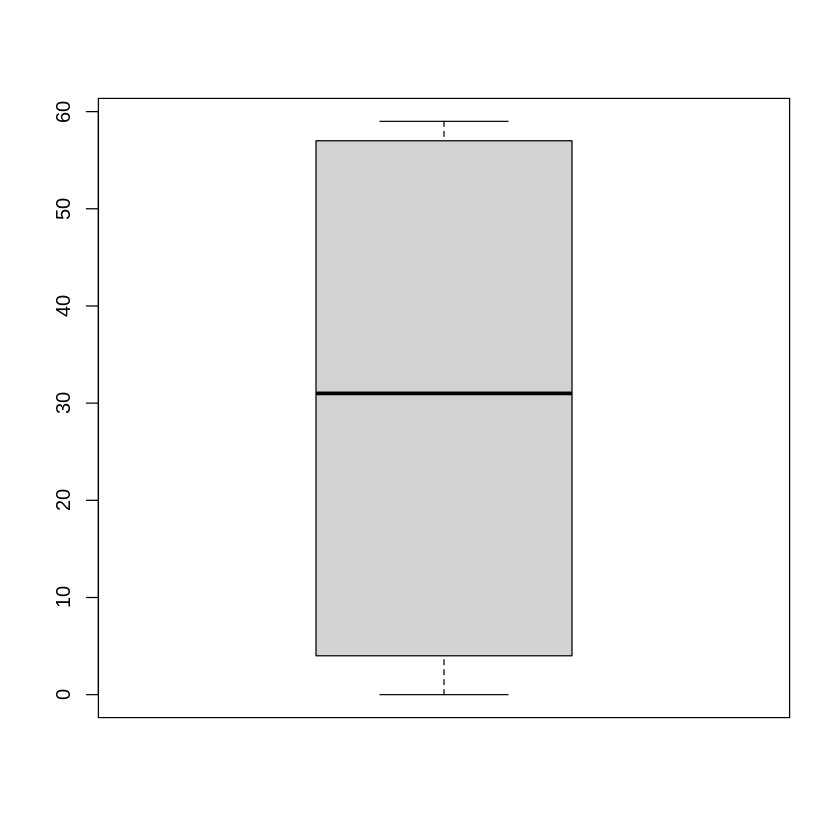

In [50]:
titulosLargos <- titulosMenosPopularidad %>% filter(nameCount >= 9 )
"¿Cuantas canciones con titulos largos?" 
nrow(titulosLargos)

summary(titulosLargos)
knitr::kable(head(titulosLargos,14))
boxplot(titulosLargos$popularity)

CONCLUSIÓN: 
Son pocas las canciones con titulos largos peor aún asi podemos decir que la gran mayoría no tienen una popularidad alta. 


####Titulos cortos

[1] "¿Cuantas canciones con titulos cortos?"

[1] 292

              name       popularity      nameCount    
 Be Alright     :  5   Min.   : 0.00   Min.   :1.000  
 Y Hubo Alguien :  4   1st Qu.: 1.00   1st Qu.:1.000  
 Better Together:  3   Median :53.00   Median :2.000  
 Heaven         :  3   Mean   :33.37   Mean   :2.271  
 Believed       :  2   3rd Qu.:59.00   3rd Qu.:3.000  
 Blanche        :  2   Max.   :59.00   Max.   :4.000  
 (Other)        :273                                  



|name             | popularity| nameCount|
|:----------------|----------:|---------:|
|It Ain't Me      |         59|         4|
|Birthday Suit    |         59|         2|
|Unappreciated    |         59|         1|
|Woman            |         59|         1|
|Campfire Cologne |         59|         2|
|In God I Trust   |         59|         4|

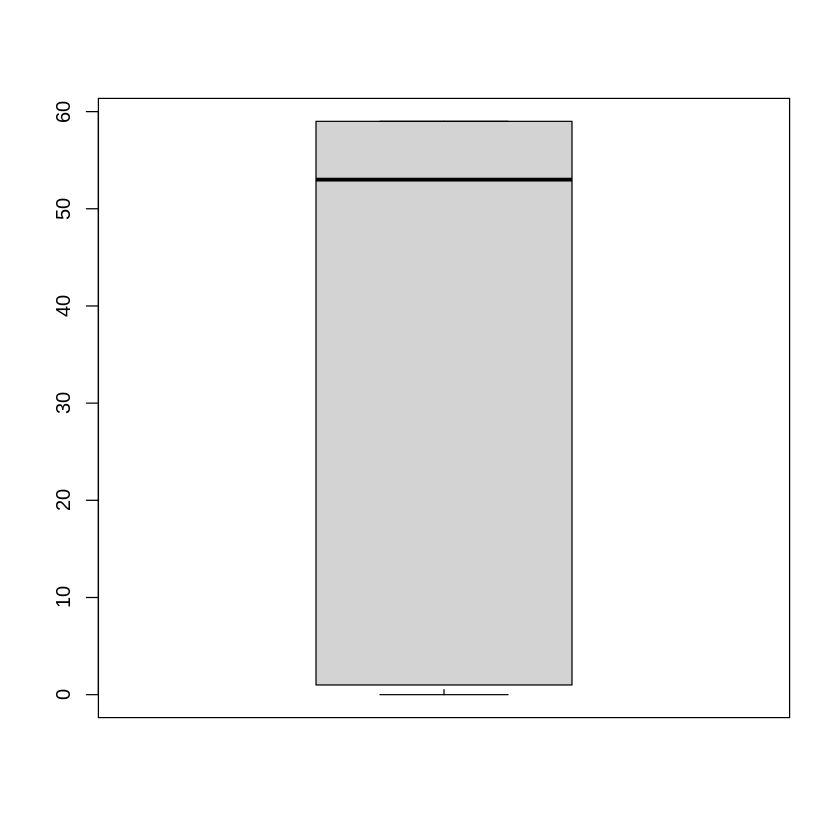

In [51]:
titulosCortos <- titulosMenosPopularidad %>% filter(nameCount <= 4)
"¿Cuantas canciones con titulos cortos?" 
nrow(titulosCortos)

summary(titulosCortos)
knitr::kable(head(titulosCortos))

boxplot(titulosCortos$popularity)

CONCLUSIÓN: 

Las cancioens con titulos cortos son mucho más frecuentes. Estamos analizando las poco populares pero aún asi podemos ver como las que tienen titulos cortos son las que más cerca están del límite 60

##Palabras

Hemos decidido que las caniones con titulos cortos son las más populares. Vamos a ver dentro de estas si hay algunas palabaras que aparecen más a menudo

In [52]:

# OPCIÓN 1 
# sin name count solo popularidad 
# diccionario con name 
# wordcloud  (filtrarla)

# OPCIÓN 2
# KEYWORDS 
# por palabras como love, sugar .... 

titulos <- titulosPopularidad %>% filter(popularity >= 80)

knitr::kable(head(titulos))
titulos$name = as.character(titulos$name)
str(titulos)

titulos$name <- tolower(titulos$name)

tsep <- data.frame(name = unlist(strsplit(as.character(titulos$name), "\\s+")))

tsep <- as.data.frame(tsep)
knitr::kable(head(tsep))





|name                                                 | popularity| nameCount|
|:----------------------------------------------------|----------:|---------:|
|Blinding Lights                                      |        100|         2|
|ROCKSTAR (feat. Roddy Ricch)                         |         99|         5|
|death bed (coffee for your head) (feat. beabadoobee) |         97|         9|
|THE SCOTTS                                           |         96|         2|
|The Box                                              |         95|         2|
|Supalonely                                           |         95|         1|

'data.frame':	425 obs. of  3 variables:
 $ name      : chr  "Blinding Lights" "ROCKSTAR (feat. Roddy Ricch)" "death bed (coffee for your head) (feat. beabadoobee)" "THE SCOTTS" ...
 $ popularity: int  100 99 97 96 95 95 95 95 94 94 ...
 $ nameCount : num  2 5 9 2 2 1 8 2 2 2 ...




|name     |
|:--------|
|blinding |
|lights   |
|rockstar |
|(feat.   |
|roddy    |
|ricch)   |

& y - aparecen siempre en la segunda posición. Revisar esto. 

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


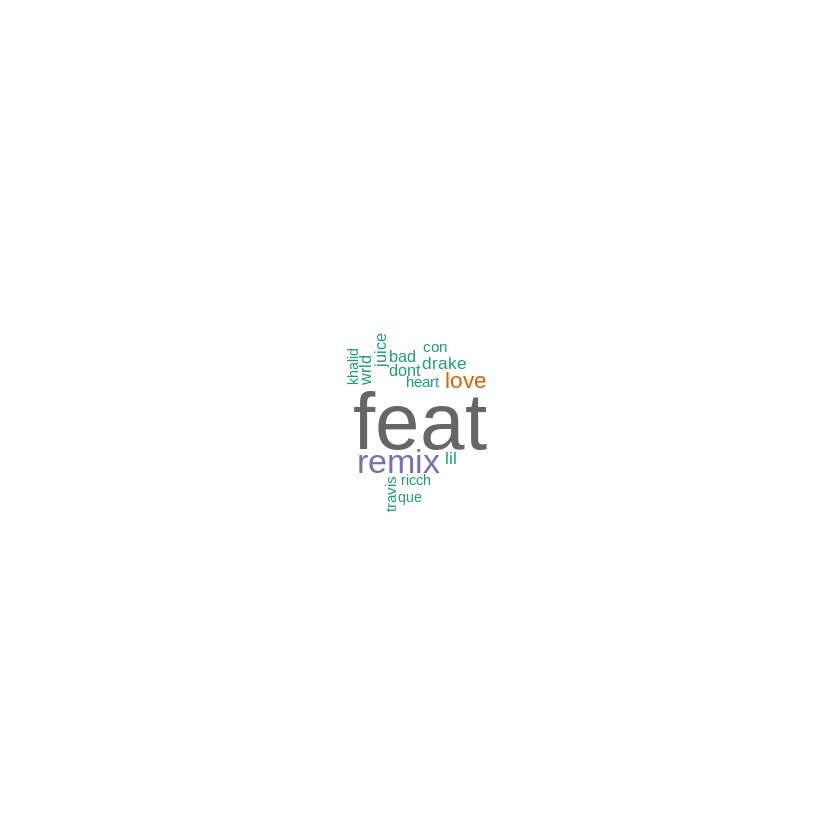

In [53]:

library(wordcloud)
library(RColorBrewer)
library(tm)
library(dplyr)
wordcloud(words = tsep$name, max.words= 15, random.order=FALSE, rot.per=0.35, colors=brewer.pal(8, "Dark2"))

Si eliminamos las palabras como feat, remix, con, el, la ... que no consideramos redundantes nos saldrán las más reptidas que nos pueden interesar a la hora de fomrula un titulo 


Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


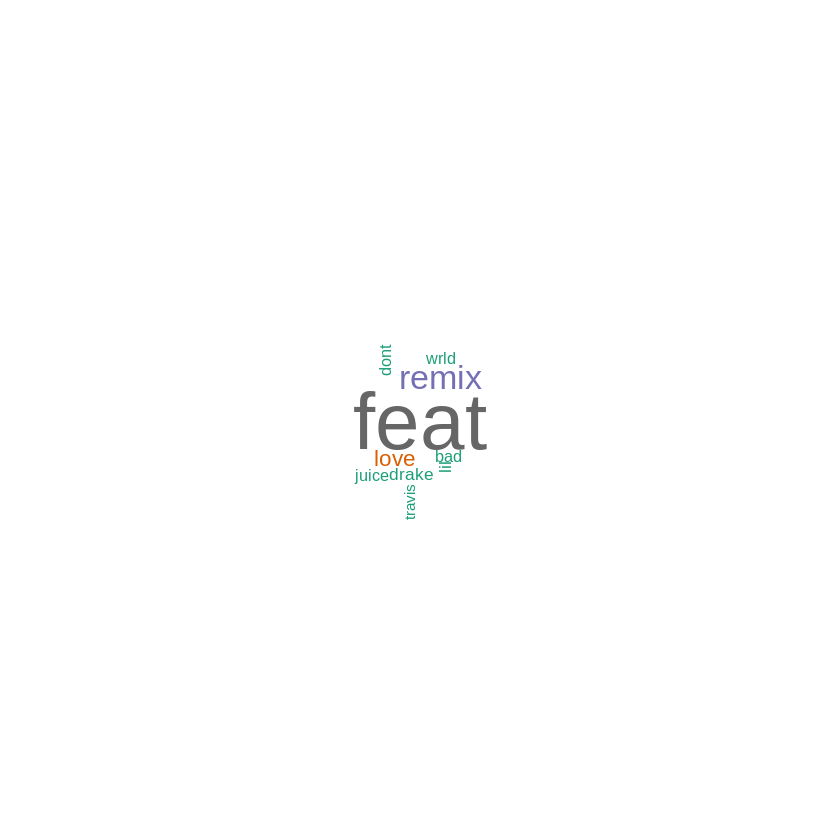

In [54]:

tsepReducido <- removePunctuation(tsep$name)
tsepReducido <- removeWords(tsep$name, words=c("-", "feat.", "feat", "remix", "&", "it"))
tsepReducido <- stripWhitespace(tsep$name)


wordcloud(words = tsepReducido, max.words= 10, random.order=FALSE, rot.per=0.35, colors=brewer.pal(8, "Dark2"))


##Artistas



|id                     |artists                                    |name           | acousticness| danceability| duration_ms| energy| explicit| instrumentalness| key| liveness| loudness| mode| popularity| speechiness|   tempo| valence| year|
|:----------------------|:------------------------------------------|:--------------|------------:|------------:|-----------:|------:|--------:|----------------:|---:|--------:|--------:|----:|----------:|-----------:|-------:|-------:|----:|
|3MoV1UsAJmz64LHqyiRMp0 |['David Guetta', 'Bebe Rexha', 'J Balvin'] |Say My Name    |       0.1370|        0.703|      198947|  0.660|        0|          0.0e+00|  10|   0.1920|   -5.119|    0|         66|      0.1230|  95.031|   0.790| 2018|
|5FlmoOiXokZHJvESrFbsyg |['6ix9ine', 'Nicki Minaj', 'Kanye West']   |MAMA           |       0.0893|        0.761|      192405|  0.672|        1|          9.8e-06|   1|   0.1400|   -5.887|    1|         68|      0.2120| 160.077|   0.437| 2018|
|5x7Fb9wMOtxd7eZzQ9EzVd |[

[1] 168



|Var1              | Freq|
|:-----------------|----:|
|['Billie Eilish'] |    9|
|['Dua Lipa']      |    7|
|['Harry Styles']  |    7|
|['J Balvin']      |    7|
|['Juice WRLD']    |    7|
|['Bad Bunny']     |    6|
|['Drake']         |    6|
|['Lewis Capaldi'] |    6|
|['The Weeknd']    |    6|
|['Travis Scott']  |    6|
|['Ariana Grande'] |    5|
|['XXXTENTACION']  |    5|

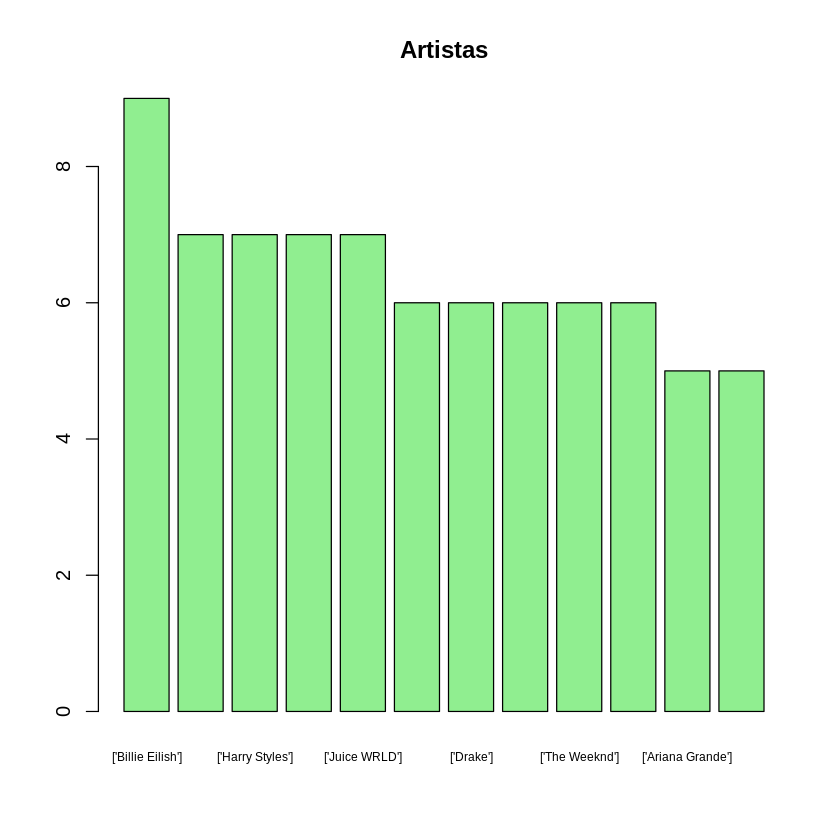

In [55]:
#DatosRecientes (2018-2020)

knitr::kable(head(datosRecientes))
datosMasPopulares<- datosRecientes %>% filter(popularity >= 80)
#¿Cuantas canciones?
nrow(datos2020MasPopulares)
#425 canciones con popularidad mayor de 80
datosMasPopulares$artist <- as.character(datosMasPopulares$artist)

tableA <- sort(table(datosMasPopulares$artists), decreasing = TRUE)



tableA <- data.frame(tableA)
tableA <- filter(tableA, Freq >= 5)

knitr::kable(head(tableA, 20))

barplot(tableA$Freq ,names.arg=tableA$Var1, cex.names = 0.6, main="Artistas", col = c("lightgreen"))


In [77]:
# Ordenamos las columnas para poner las primero los strings y más adelante todos los númericos 
knitr::kable(head(datos, 20))
datos <- datos [ , c(12,2,10,1,3,4,5,6,8,9,11,13,14,15,16,17)]
knitr::kable(head(datos, 20))



|id                     |artists                                                                                                                                       |name                                           | energy| mode| instrumentalness| acousticness| key| liveness| loudness| danceability| popularity| speechiness|   tempo| valence| year|
|:----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------|:----------------------------------------------|------:|----:|----------------:|------------:|---:|--------:|--------:|------------:|----------:|-----------:|-------:|-------:|----:|
|04mksGkKle0NWpOwGGc4Wh |['Sam Cooke']                                                                                                                                 |Sweet Leilani                                  |  0.394|    1|         2.10e-05|        0.797|   8|   0.1790|  -10.899|        0

ERROR: ignored



|id                     |artists                          |name                                                    | energy| mode| instrumentalness| acousticness| key| liveness| loudness| danceability| popularity| speechiness|   tempo| valence| year|
|:----------------------|:--------------------------------|:-------------------------------------------------------|------:|----:|----------------:|------------:|---:|--------:|--------:|------------:|----------:|-----------:|-------:|-------:|----:|
|3yrSvpt2l1xhsV9Em88Pul |['Van Morrison']                 |Brown Eyed Girl                                         |  0.583|    1|         0.00e+00|      0.18200|   7|   0.4070|  -10.964|        0.491|         80|      0.0376| 150.572|   0.907| 1967|
|7tqhbajSfrz2F7E1Z75ASX |['Marvin Gaye', 'Tammi Terrell'] |Ain't No Mountain High Enough                           |  0.600|    1|         0.00e+00|      0.43000|   7|   0.1840|  -10.870|        0.663|         80|      0.0320| 129.991|   0.800| 

                      id                                artists 
 0ofHAoxe9vBkTCp2UQIavz:1   ['Elton John']                  :2  
 2RlgNHKcydI9sayD2Df2xp:1   ['AC/DC']                       :1  
 2TVxnKdb3tqe1nhQWwwZCO:1   ['Creedence Clearwater Revival']:1  
 2zYzyRzz6pRmhPzyfMEC8s:1   ['Eagles']                      :1  
 3gdewACMIVMEWVbyb8O9sY:1   ['Electric Light Orchestra']    :1  
 3yrSvpt2l1xhsV9Em88Pul:1   ['Fleetwood Mac']               :1  
 (Other)               :5   (Other)                         :4  
                                   name       energy            mode       
 Ain't No Mountain High Enough       :1   Min.   :0.3380   Min.   :0.0000  
 Brown Eyed Girl                     :1   1st Qu.:0.5000   1st Qu.:1.0000  
 Dreams - 2004 Remaster              :1   Median :0.5400   Median :1.0000  
 Fortunate Son                       :1   Mean   :0.5638   Mean   :0.9091  
 Here Comes The Sun - Remastered 2009:1   3rd Qu.:0.6025   3rd Qu.:1.0000  
 Highway to Hell        

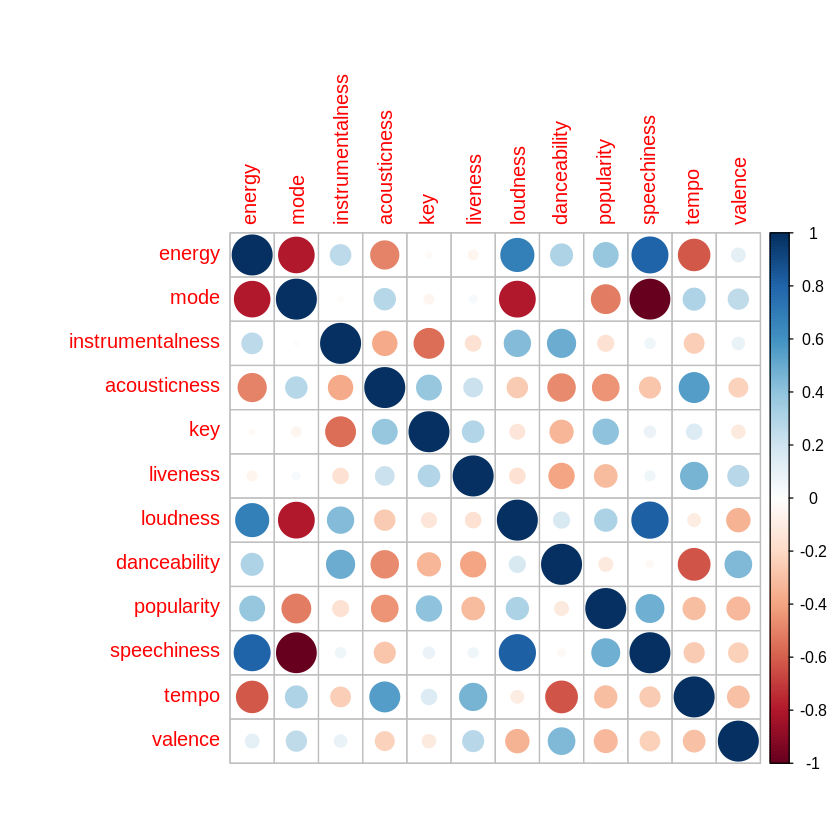

In [100]:



datosAntiguos <- datos %>% filter (year >= 1960, year < 1980, popularity >= 80)
knitr::kable(head(datosAntiguos, 20))

summary(datosAntiguos)

correlationdatosAntiguos<- datosAntiguos %>% select(energy:valence)
M <- cor(correlationdatosAntiguos) # matriz de correlación 

# “circle”, “square”, “ellipse”, “number”, “shade”, “color”, “pie”
corrplot(M, method = "circle")




Patrón de una canción antigua popular. Parece que las canciones de los 60', 70' que siguen siendo populares tienen bastante energía, 'speechness' (si es mu hablado o hay un valance entre música y letra) y 'loudness' (la cantidad de decibelios)





##NO USADO

In [57]:
titulosSep$N1 <- tolower(titulosSep$N1)
titulosSep$N2 <- tolower(titulosSep$N2)



knitr::kable(head(titulosSep))

#NA are not counted 
table1 <- sort(table(unlist(titulosSep$N1)),decreasing = TRUE)
knitr::kable(head(table1)) 

table2 <- sort(table(unlist(titulosSep$N2)),decreasing = TRUE)
knitr::kable(head(table2)) 




ERROR: ignored

In [ ]:
table1 <- as.data.frame(table1)
table2 <- as.data.frame(table2)

result <- full_join(table1,table2, by = "Var1")
result[is.na(result)] <- 0
result$FreqTotales = rowSums(result[ , 2:3])
result <- result[order(-result$FreqTotales),]
knitr::kable(head(result,20)) 

In [ ]:
Tsep <- sort(table(tsep),decreasing = TRUE)

Tsep <- as.data.frame(Tsep)
knitr::kable(head(Tsep))



titulosSep <- titulos %>%
  separate(name, c("N1", "N2"), " ")

knitr::kable(head(titulosSep))
"¿Cuantas Canciones?" 
nrow(titulosSep)